In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [4]:
columns = ['strength', 'pa', 'num_images', 'pos_rms', 'mag_rms', 't_mpole_str', 't_mpole_pa', 'chi2', 'z', 'x', 'y', 'e', 'pow_pa', 'r_ein', 'pwi']
df = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Test/Sim 10_summary.csv', header=None, names=columns, skiprows=1) 
df

strength         pa  num_images   pos_rms       mag_rms  t_mpole_str  \
0          0.001    0.00000           0  0.000000       0.00000     0.000000   
1          0.001    0.36036           2  0.586094  406692.15825     0.000002   
2          0.001    0.72072           8       NaN           NaN     0.009153   
3          0.001    1.08108           8       NaN           NaN     0.064055   
4          0.001    1.44144           9       NaN           NaN     0.017955   
...          ...        ...         ...       ...           ...          ...   
999995     0.100  358.19820           8       NaN           NaN     0.085305   
999996     0.100  358.55856           8       NaN           NaN     0.093393   
999997     0.100  358.91892           8       NaN           NaN     0.083411   
999998     0.100  359.27928           8       NaN           NaN     0.103699   
999999     0.100  359.63964           8       NaN           NaN     0.088945   

        t_mpole_pa        chi2    z         x         y             e  \
0         0.000000    0.000000  0.0   0.00000   0.00000  0.000000e+00   
1       -32.676230  586.470100  1.0  20.80800  20.77519  3.243274e-07   
2         0.321549    0.000002  1.0  20.80973  20.78384  2.428864e-02   
3        -3.066936    0.000003  1.0  20.80984  20.81364  1.222924e-02   
4        -1.991766  144.997600  1.0  20.80797  20.80005  5.976250e-09   
...            ...         ...  ...       ...       ...           ...   
999995  357.278900    0.000003  1.0  20.81024  20.80457  3.154899e-02   
999996  357.366000    0.000002  1.0  20.81034  20.80282  4.316221e-02   
999997  357.393700    0.000002  1.0  20.81024  20.80295  3.880312e-02   
999998  357.017400    0.000003  1.0  20.81041  20.80798  2.048553e-02   
999999  357.068800    0.000002  1.0  20.81026  20.80810  1.955335e-02   

            pow_pa     r_ein       pwi  
0         0.000000  0.000000  0.000000  
1        85.655710  0.487855  1.502942  
2       170.710900  0.491122  1.502595  
3        29.932690  0.495335  1.971658  
4       104.616700  0.493283  1.532596  
...            ...       ...       ...  
999995    5.355434  0.494440  2.292411  
999996    2.706225  0.494334  2.385432  
999997    2.180373  0.494210  2.304147  
999998   24.875420  0.495172  2.373869  
999999   18.106600  0.494982  2.262961  

[1000000 rows x 15 columns]

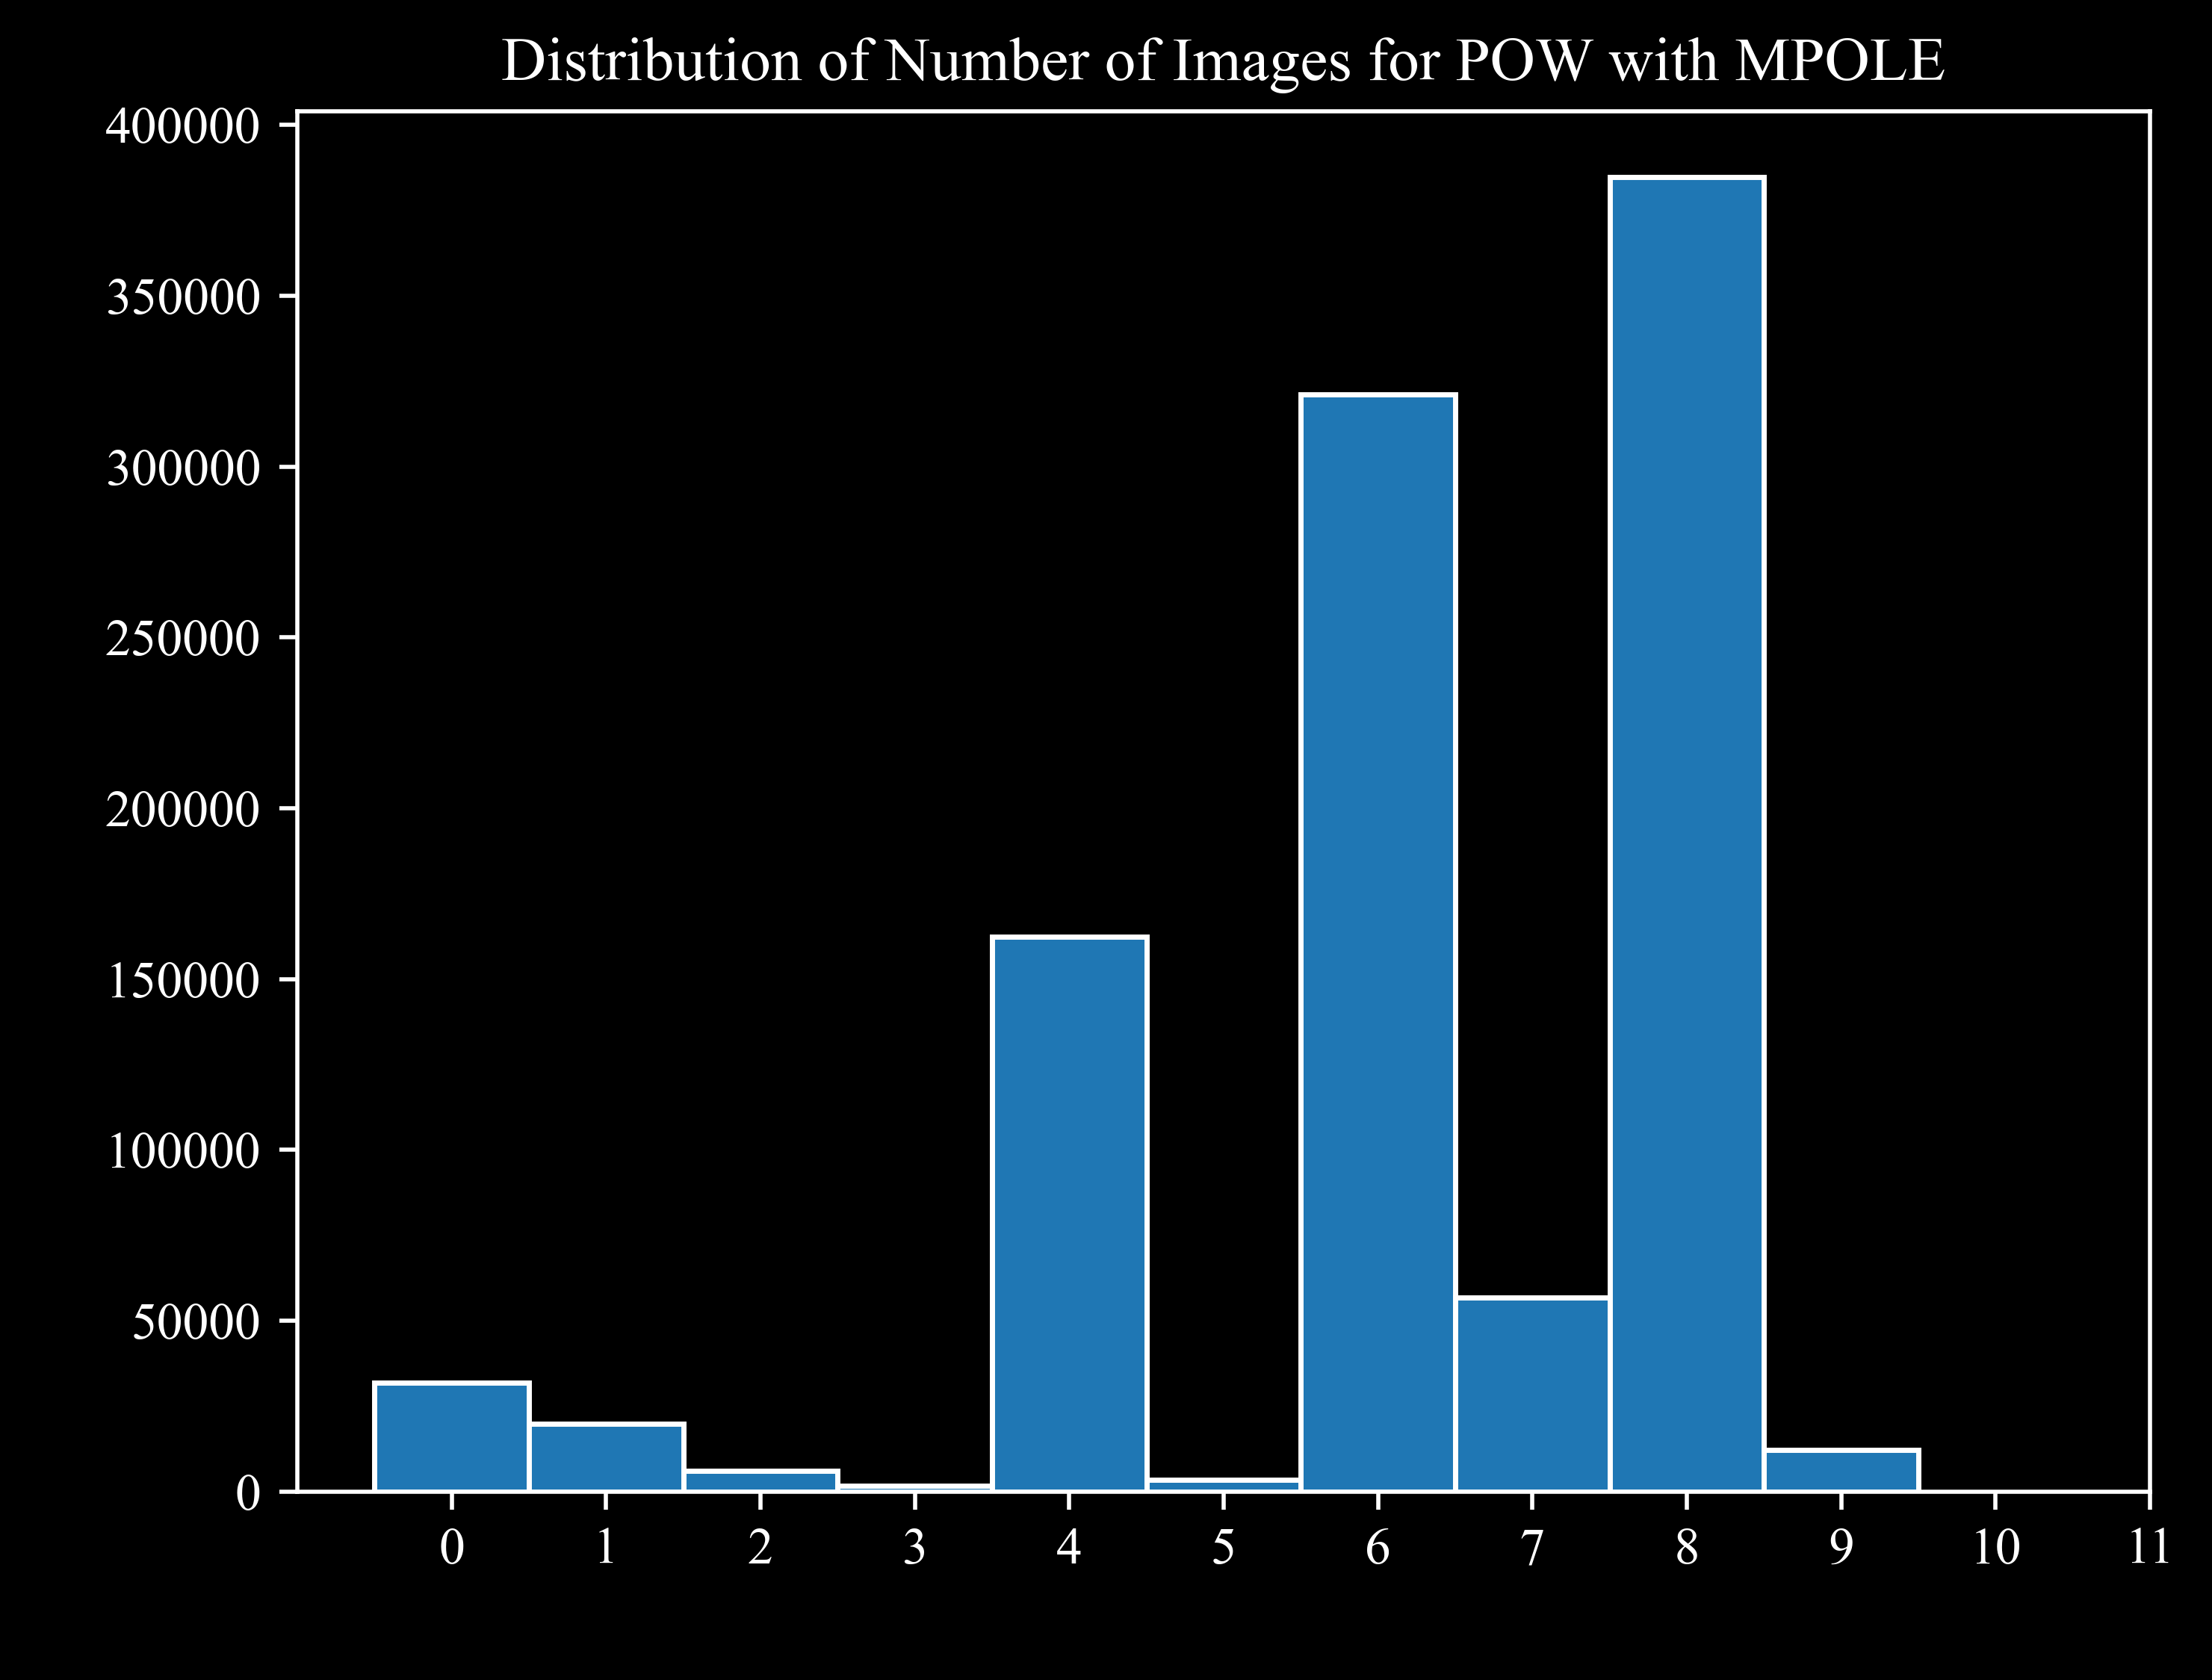

In [5]:
plt.hist(df['num_images'], bins=range(0, 11), align='left', edgecolor='w')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images for POW with MPOLE')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

In [6]:
mask = df['num_images'] == 4
filtered_df_0 = df[mask]
filtered_df_0 = filtered_df_0.reset_index(drop=True)

# Precentage of 4 image models 
percentage_4_images = (len(filtered_df_0) / len(df)) * 100
print(f"Percentage of 4 image models: {percentage_4_images:.2f}%")

Percentage of 4 image models: 16.23%


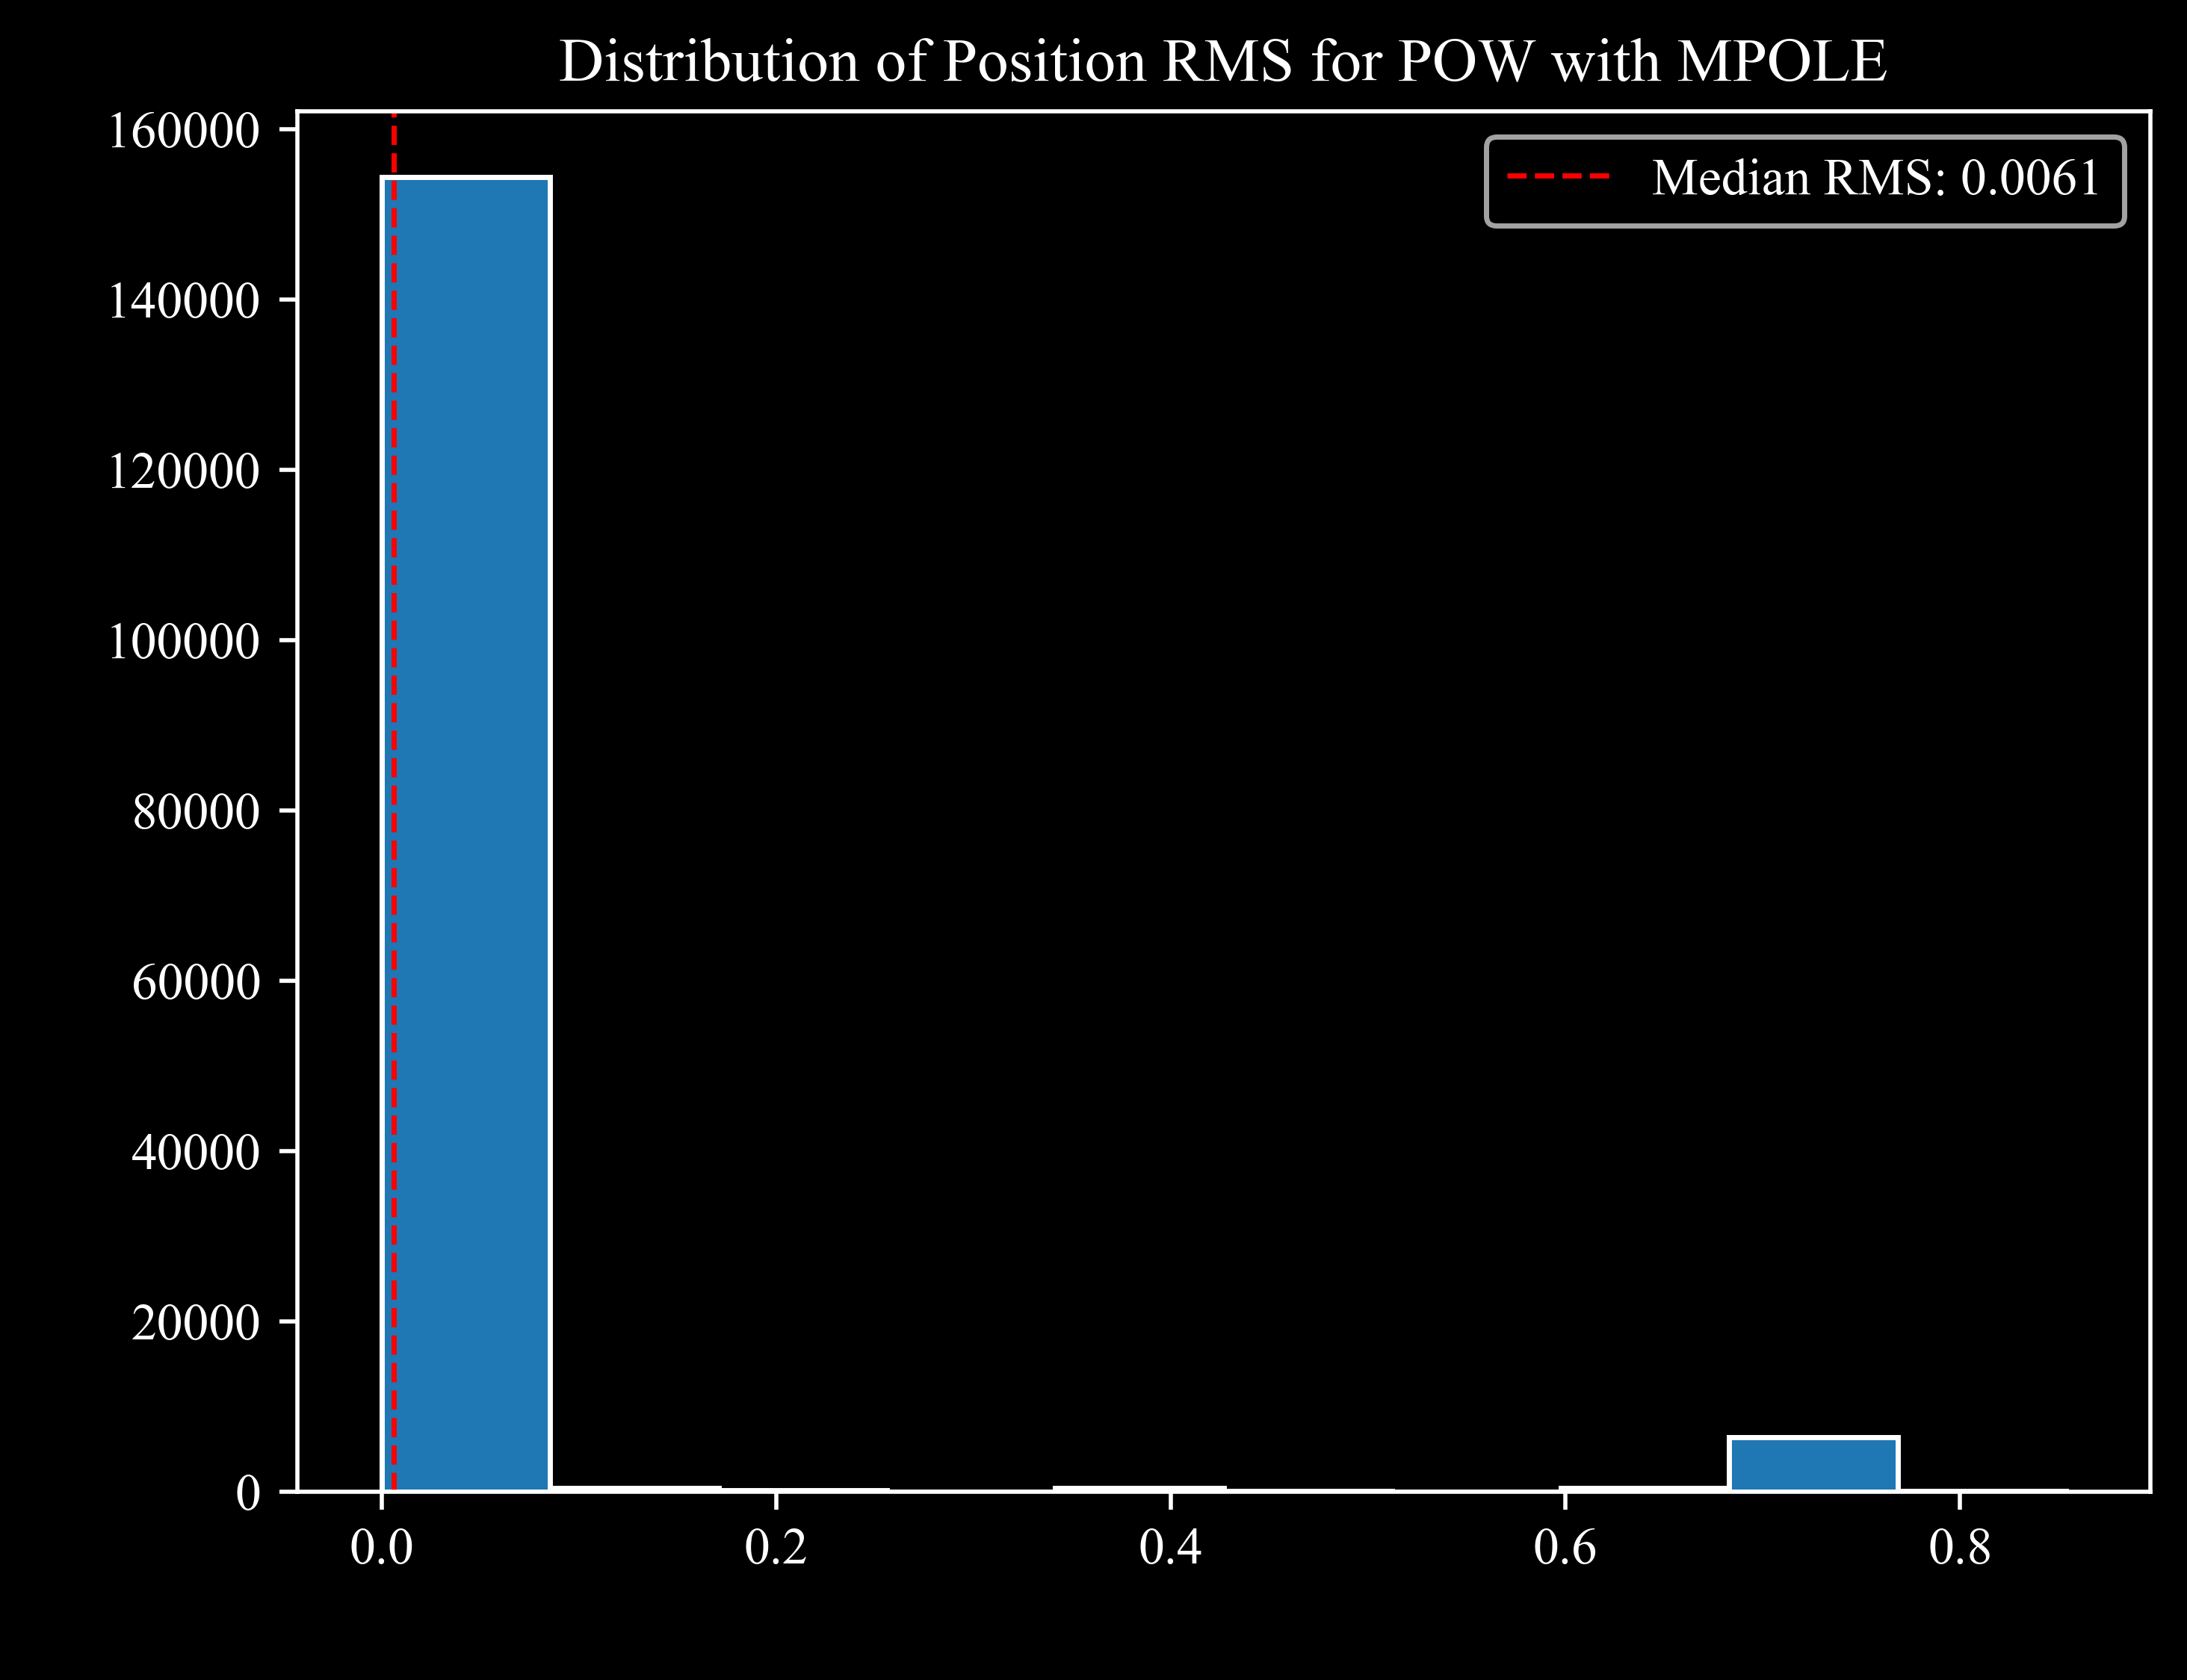

In [7]:
plt.hist(filtered_df_0['pos_rms'], bins=10, edgecolor='w')
plt.axvline(filtered_df_0['pos_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['pos_rms'].median(), 4)))
plt.xlabel('Position RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Position RMS for POW with MPOLE')
plt.show()

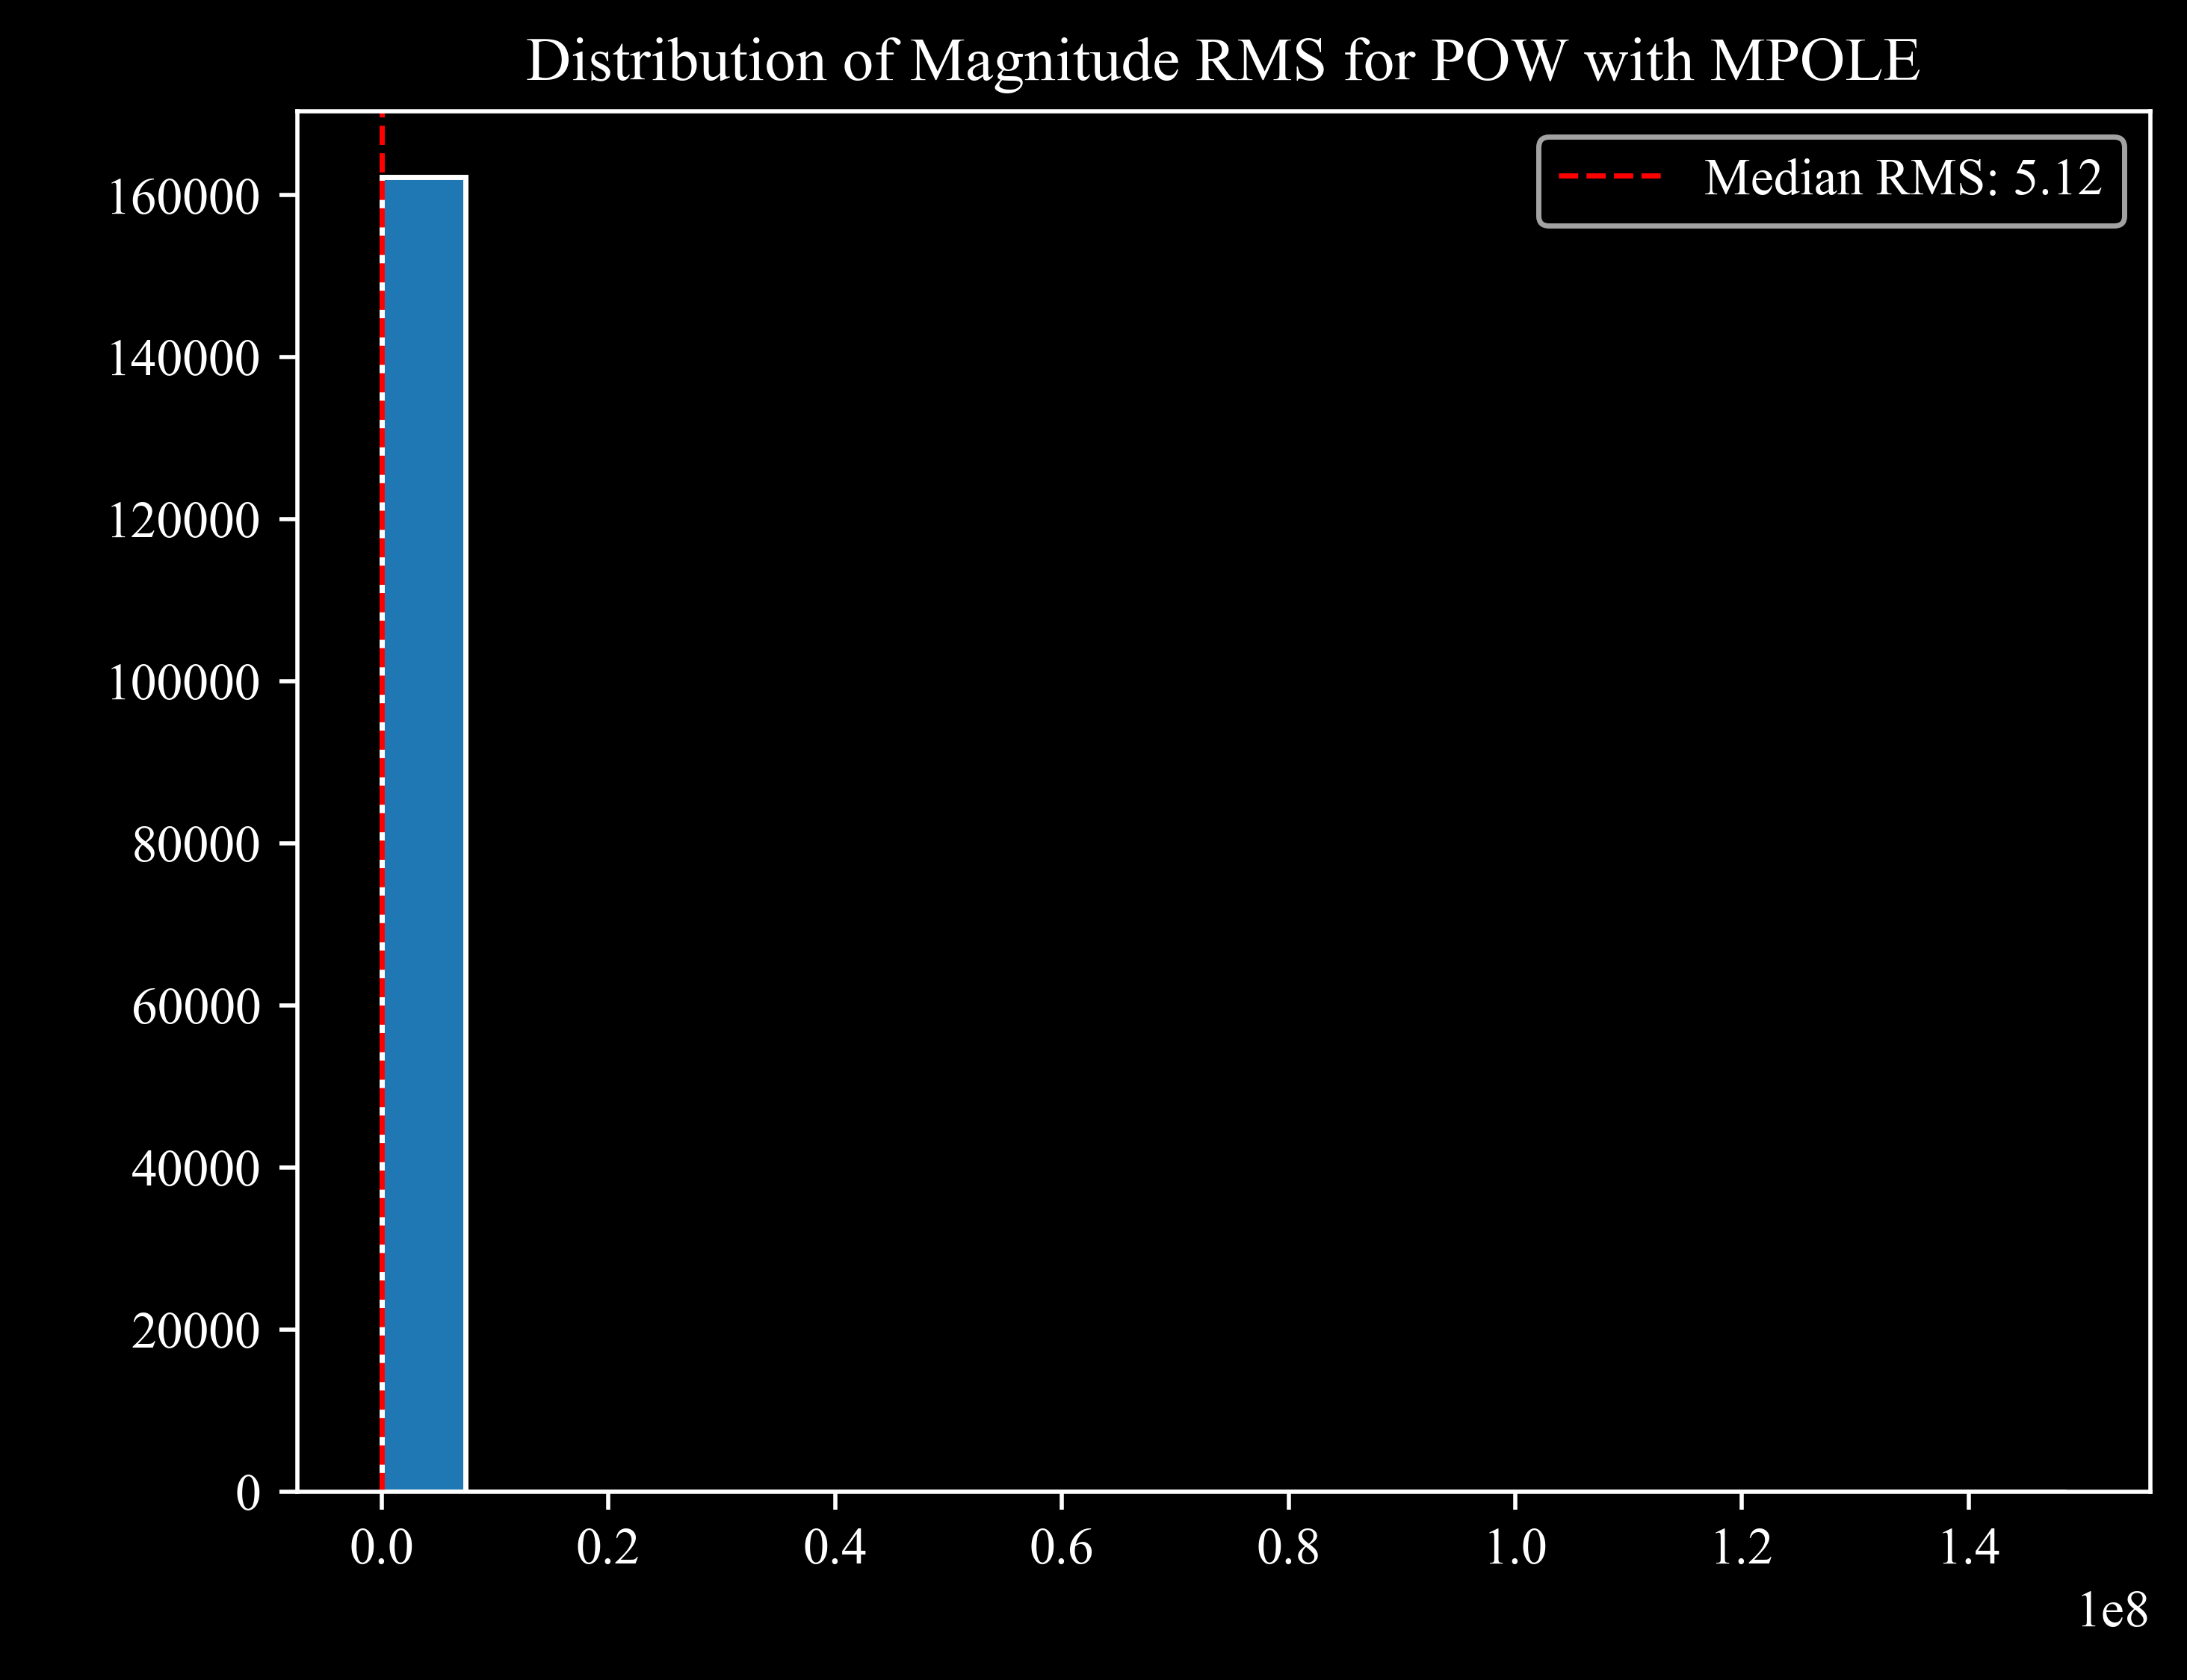

In [8]:
plt.hist(filtered_df_0['mag_rms'], bins=20, edgecolor='w')
plt.axvline(filtered_df_0['mag_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['mag_rms'].median(), 2)))
plt.xlabel('Magnitude RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Magnitude RMS for POW with MPOLE')
plt.show()

In [9]:
mask2 = filtered_df_0['pos_rms']  == 3.101229586803652e-05
filtered_df = filtered_df_0[mask2]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

strength         pa  num_images   pos_rms    mag_rms  t_mpole_str  \
0       0.0011   13.33333           4  0.000031   6.506000     0.057303   
1       0.0012   69.90991           4  0.000031  11.326400     0.055895   
2       0.0013   12.25225           4  0.000031   8.439000     0.055498   
3       0.0013  332.25225           4  0.000031  17.417475     0.056238   
4       0.0014    8.28829           4  0.000031  23.165125     0.060315   
...        ...        ...         ...       ...        ...          ...   
1558    0.0998  210.09009           4  0.000031   8.622975     0.055395   
1559    0.0998  289.00901           4  0.000031  10.110200     0.056120   
1560    0.0998  291.89189           4  0.000031   8.948500     0.057591   
1561    0.0998  338.37838           4  0.000031  11.156625     0.056218   
1562    0.0999  225.94595           4  0.000031   6.968375     0.056393   

      t_mpole_pa      chi2    z         x         y         e      pow_pa  \
0       49.69120  0.000002  1.0  20.79289  20.70752  0.514376  180.163800   
1       52.25379  0.000002  1.0  20.79198  20.71605  0.491806    1.229049   
2      140.62900  0.000003  1.0  20.79259  20.71181  0.491243  180.643900   
3      323.06610  0.000003  1.0  20.79159  20.71843  0.484467    1.630468   
4      -34.99752  0.000003  1.0  20.79077  20.72195  0.507025  182.201200   
...          ...       ...  ...       ...       ...       ...         ...   
1558   230.66020  0.000003  1.0  20.79257  20.71200  0.489548    0.668366   
1559   322.13340  0.000002  1.0  20.79206  20.71542  0.497709    1.125866   
1560   322.86790  0.000002  1.0  20.79187  20.71620  0.518446    1.186723   
1561   322.46280  0.000003  1.0  20.79191  20.71637  0.495567    1.270466   
1562   229.78850  0.000002  1.0  20.79286  20.70874  0.500576    0.288893   

         r_ein       pwi  
0     0.501723  2.343238  
1     0.499793  2.350702  
2     0.500325  2.335159  
3     0.499264  2.351460  
4     0.499558  2.385762  
...        ...       ...  
1558  0.500244  2.334120  
1559  0.500067  2.354444  
1560  0.500685  2.377444  
1561  0.499877  2.355595  
1562  0.501057  2.333753  

[1563 rows x 15 columns]

In [10]:
# Percentage Calc
num_goodfit = len(filtered_df)
num_total = len(df[df['num_images'] == 4])
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits out of 4 image models: {percentage_goodfit:.2f}%")

num_goodfit = len(filtered_df)
num_total = len(df)
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits: {percentage_goodfit:.2f}%")

Percentage of good fits out of 4 image models: 0.96%
Percentage of good fits: 0.16%


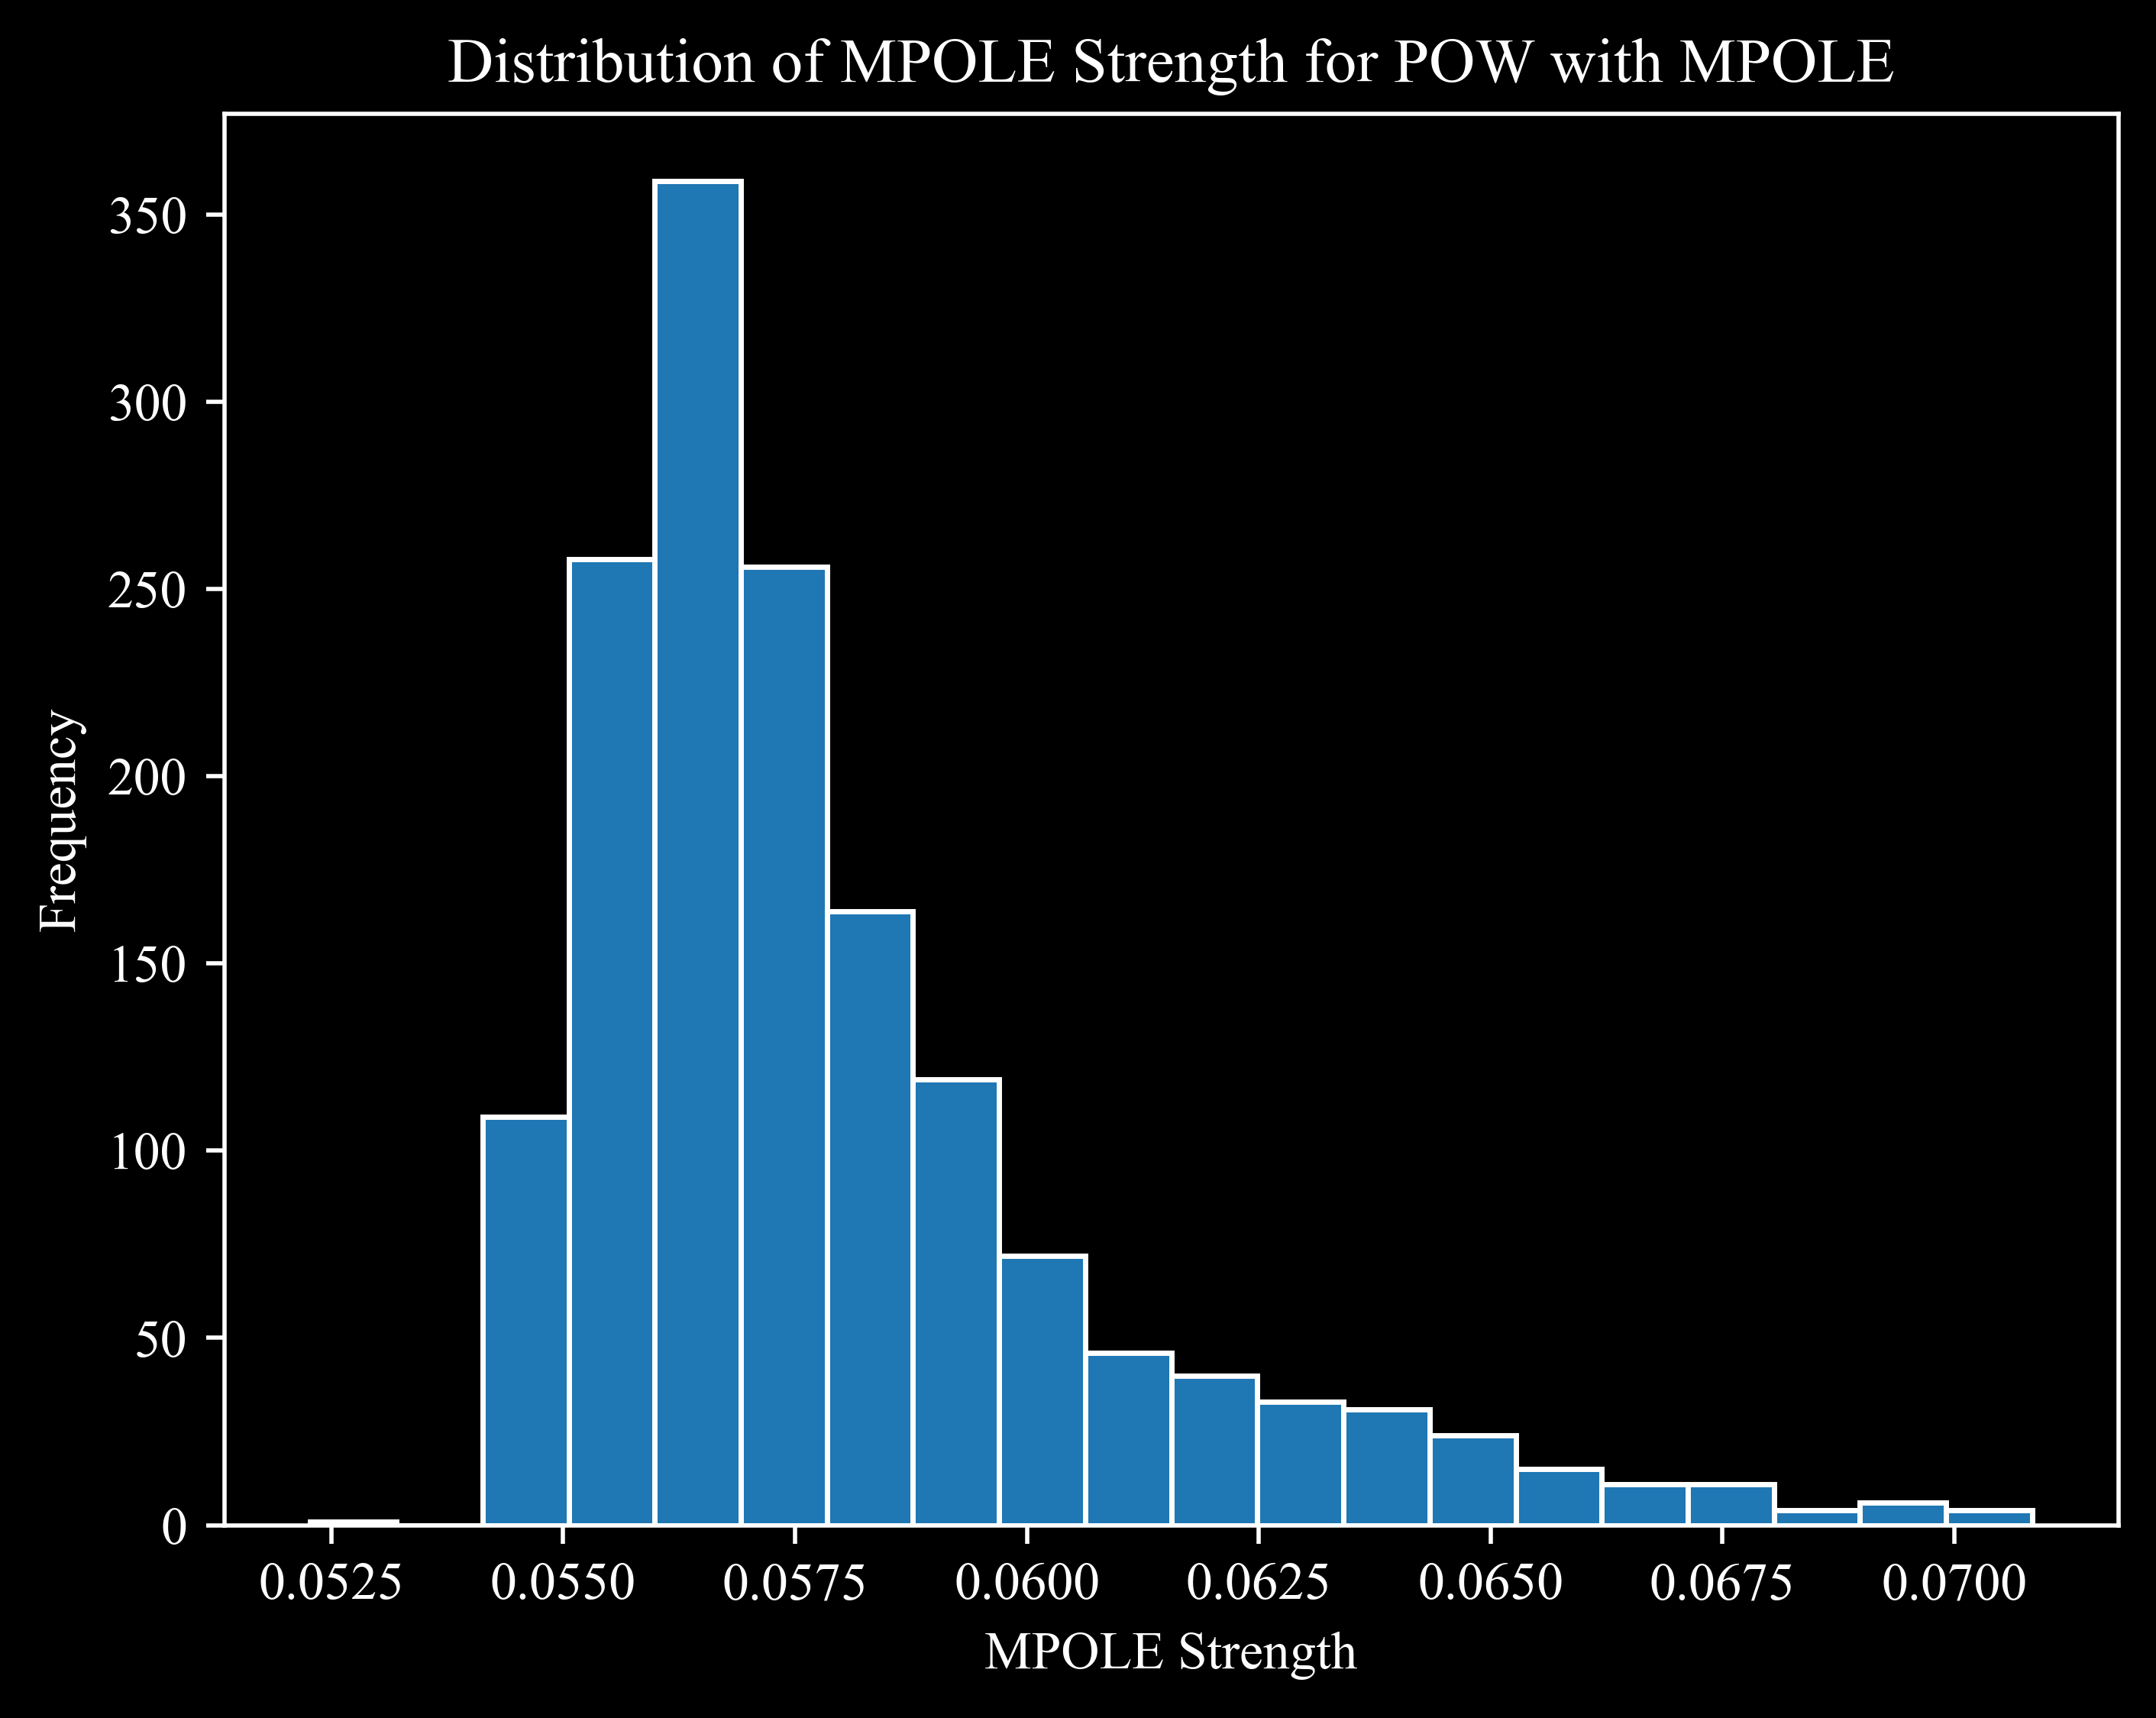

In [11]:
plt.hist(filtered_df['t_mpole_str'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Strength for POW with MPOLE')
plt.show()

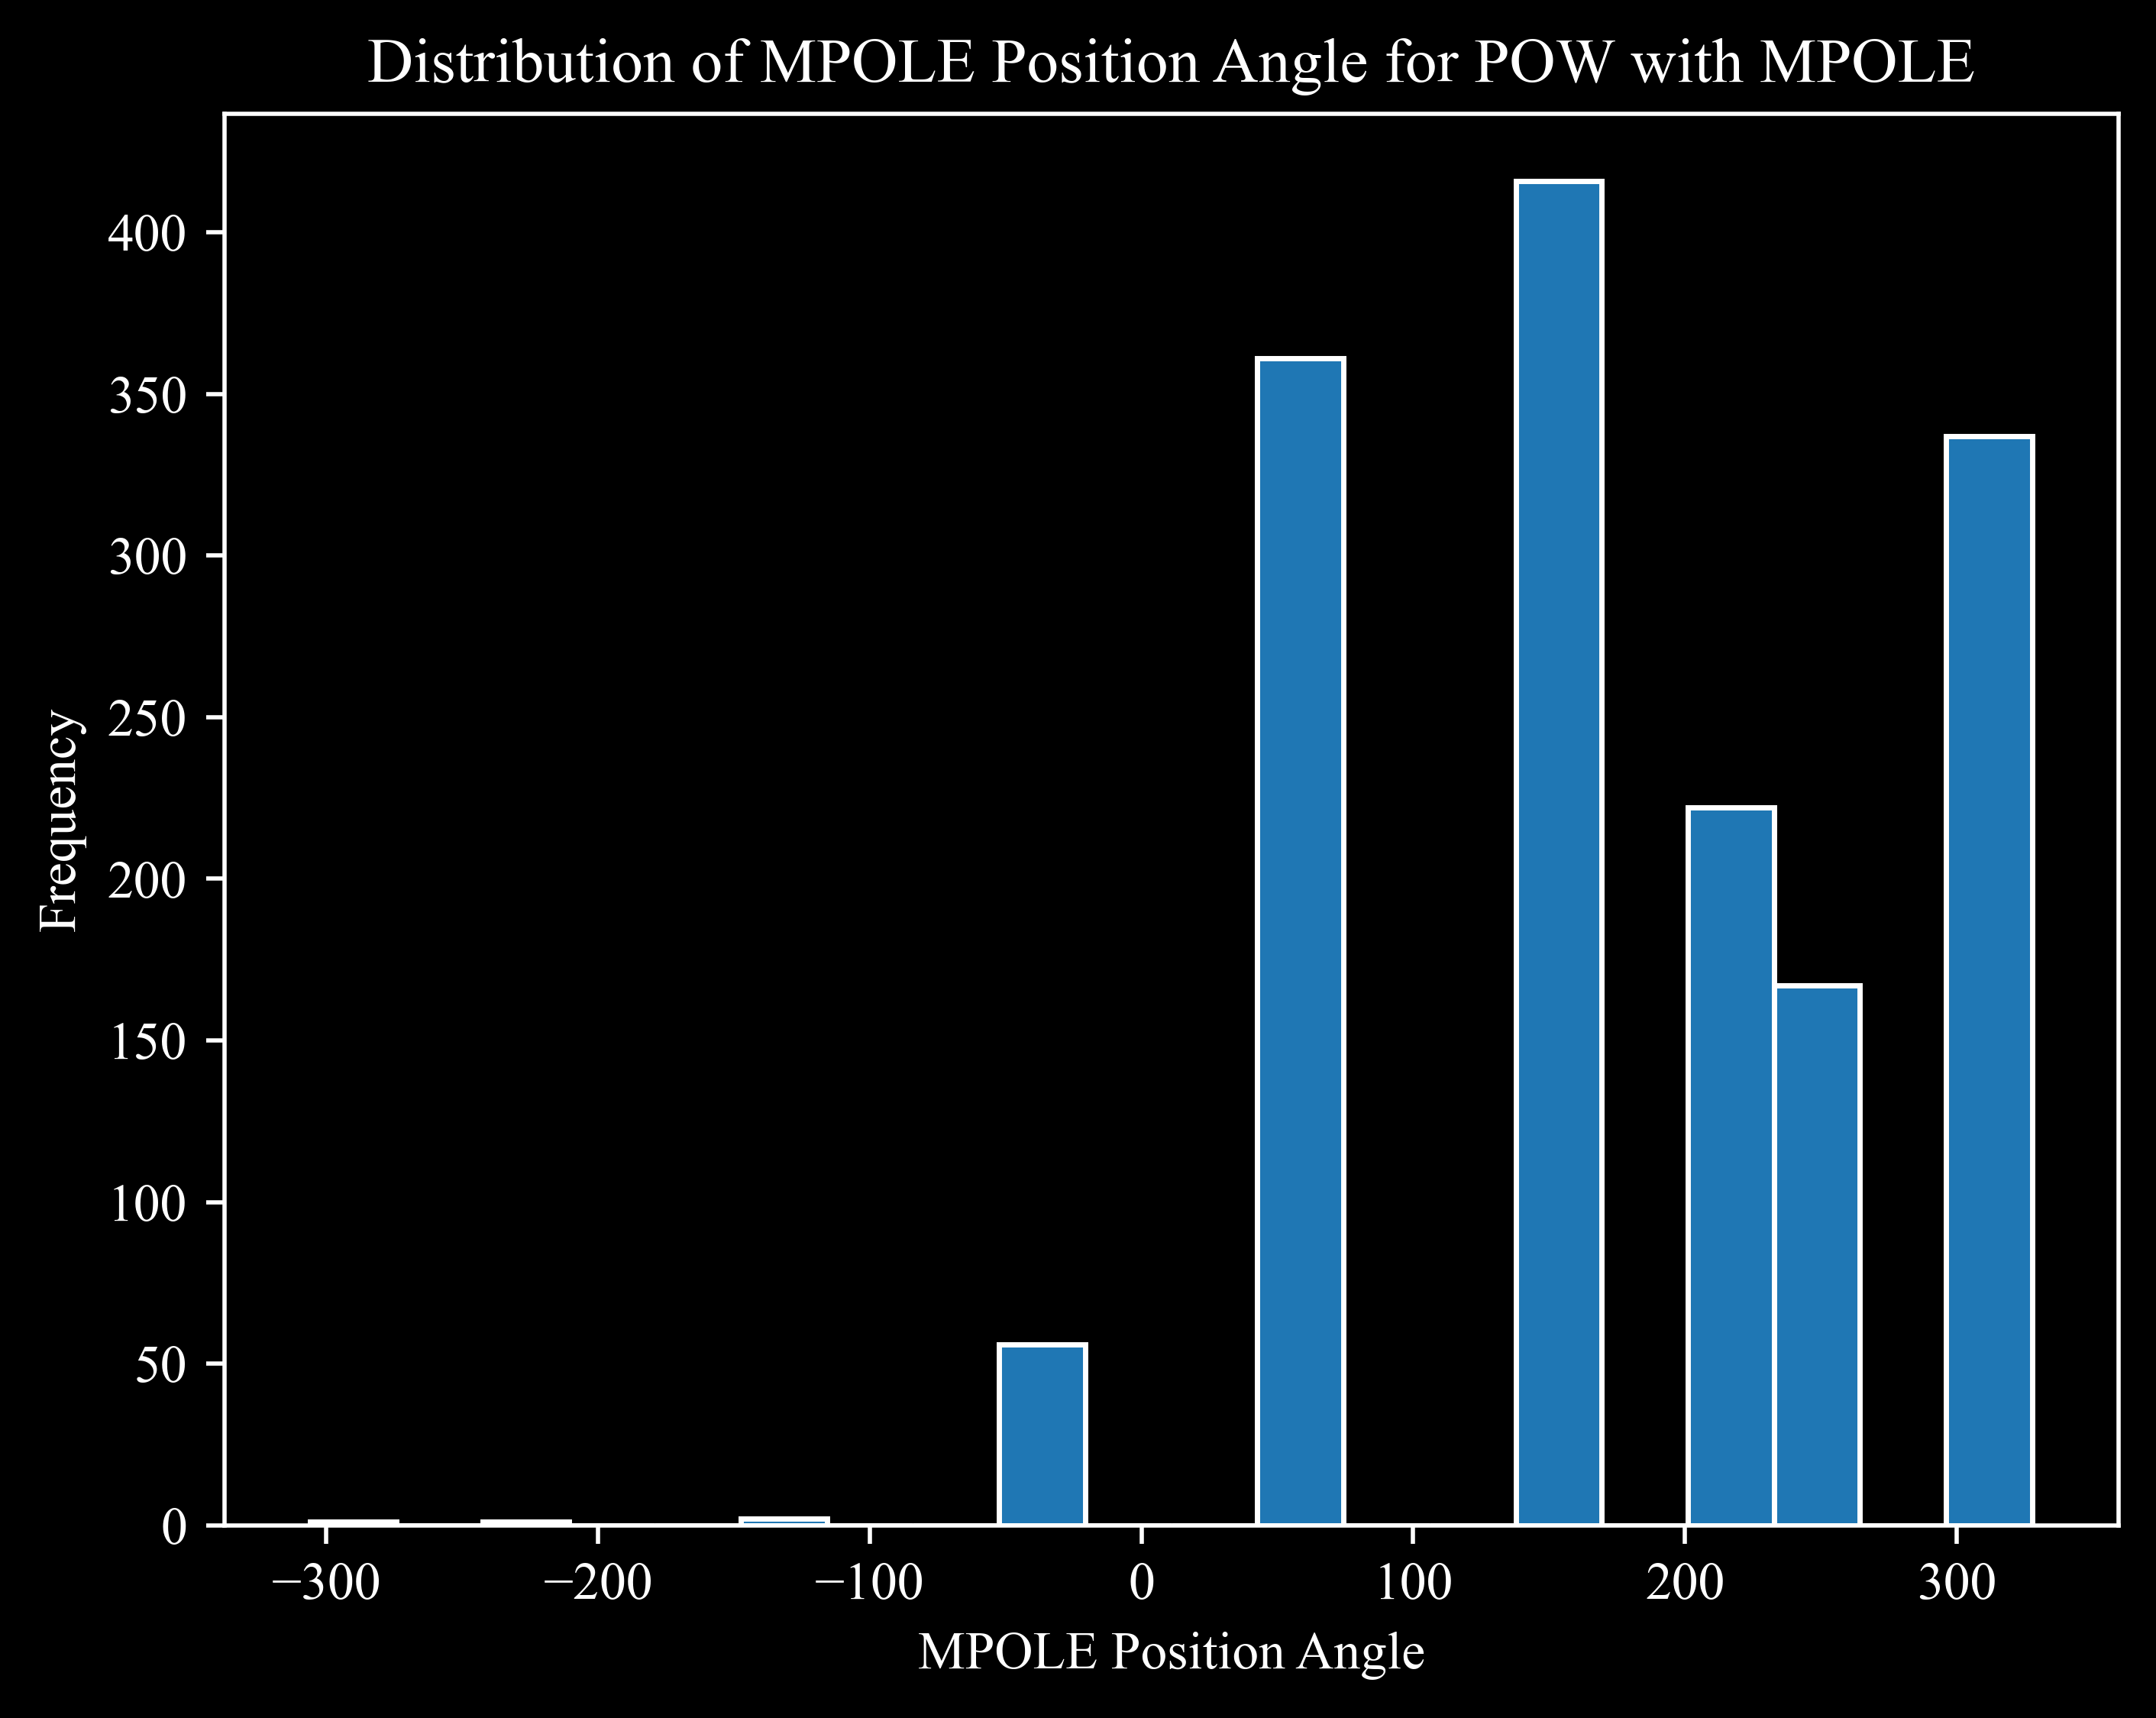

In [12]:
plt.hist(filtered_df['t_mpole_pa'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Position Angle', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Position Angle for POW with MPOLE')
plt.show()

In [13]:
aligned_pa = (filtered_df['t_mpole_pa'] > 100) & (filtered_df['t_mpole_pa'] < 200)
num_aligned = len(filtered_df[aligned_pa])
print(f"Number of aligned MPOLE position angles: {num_aligned}")
anti_aligned_pa = (filtered_df['t_mpole_pa'] < 0) | (filtered_df['t_mpole_pa'] > 200)
print(f"Number of anti-aligned MPOLE position angles: {len(filtered_df[anti_aligned_pa])}")

# Percentage
percentage_aligned = (num_aligned / len(filtered_df)) * 100
print(f"Percentage of aligned MPOLE position angles: {percentage_aligned:.2f}%")
percentage_anti_aligned = (len(filtered_df[anti_aligned_pa]) / len(filtered_df)) * 100
print(f"Percentage of anti-aligned MPOLE position angles: {percentage_anti_aligned:.2f}%")

Number of aligned MPOLE position angles: 416
Number of anti-aligned MPOLE position angles: 786
Percentage of aligned MPOLE position angles: 26.62%
Percentage of anti-aligned MPOLE position angles: 50.29%


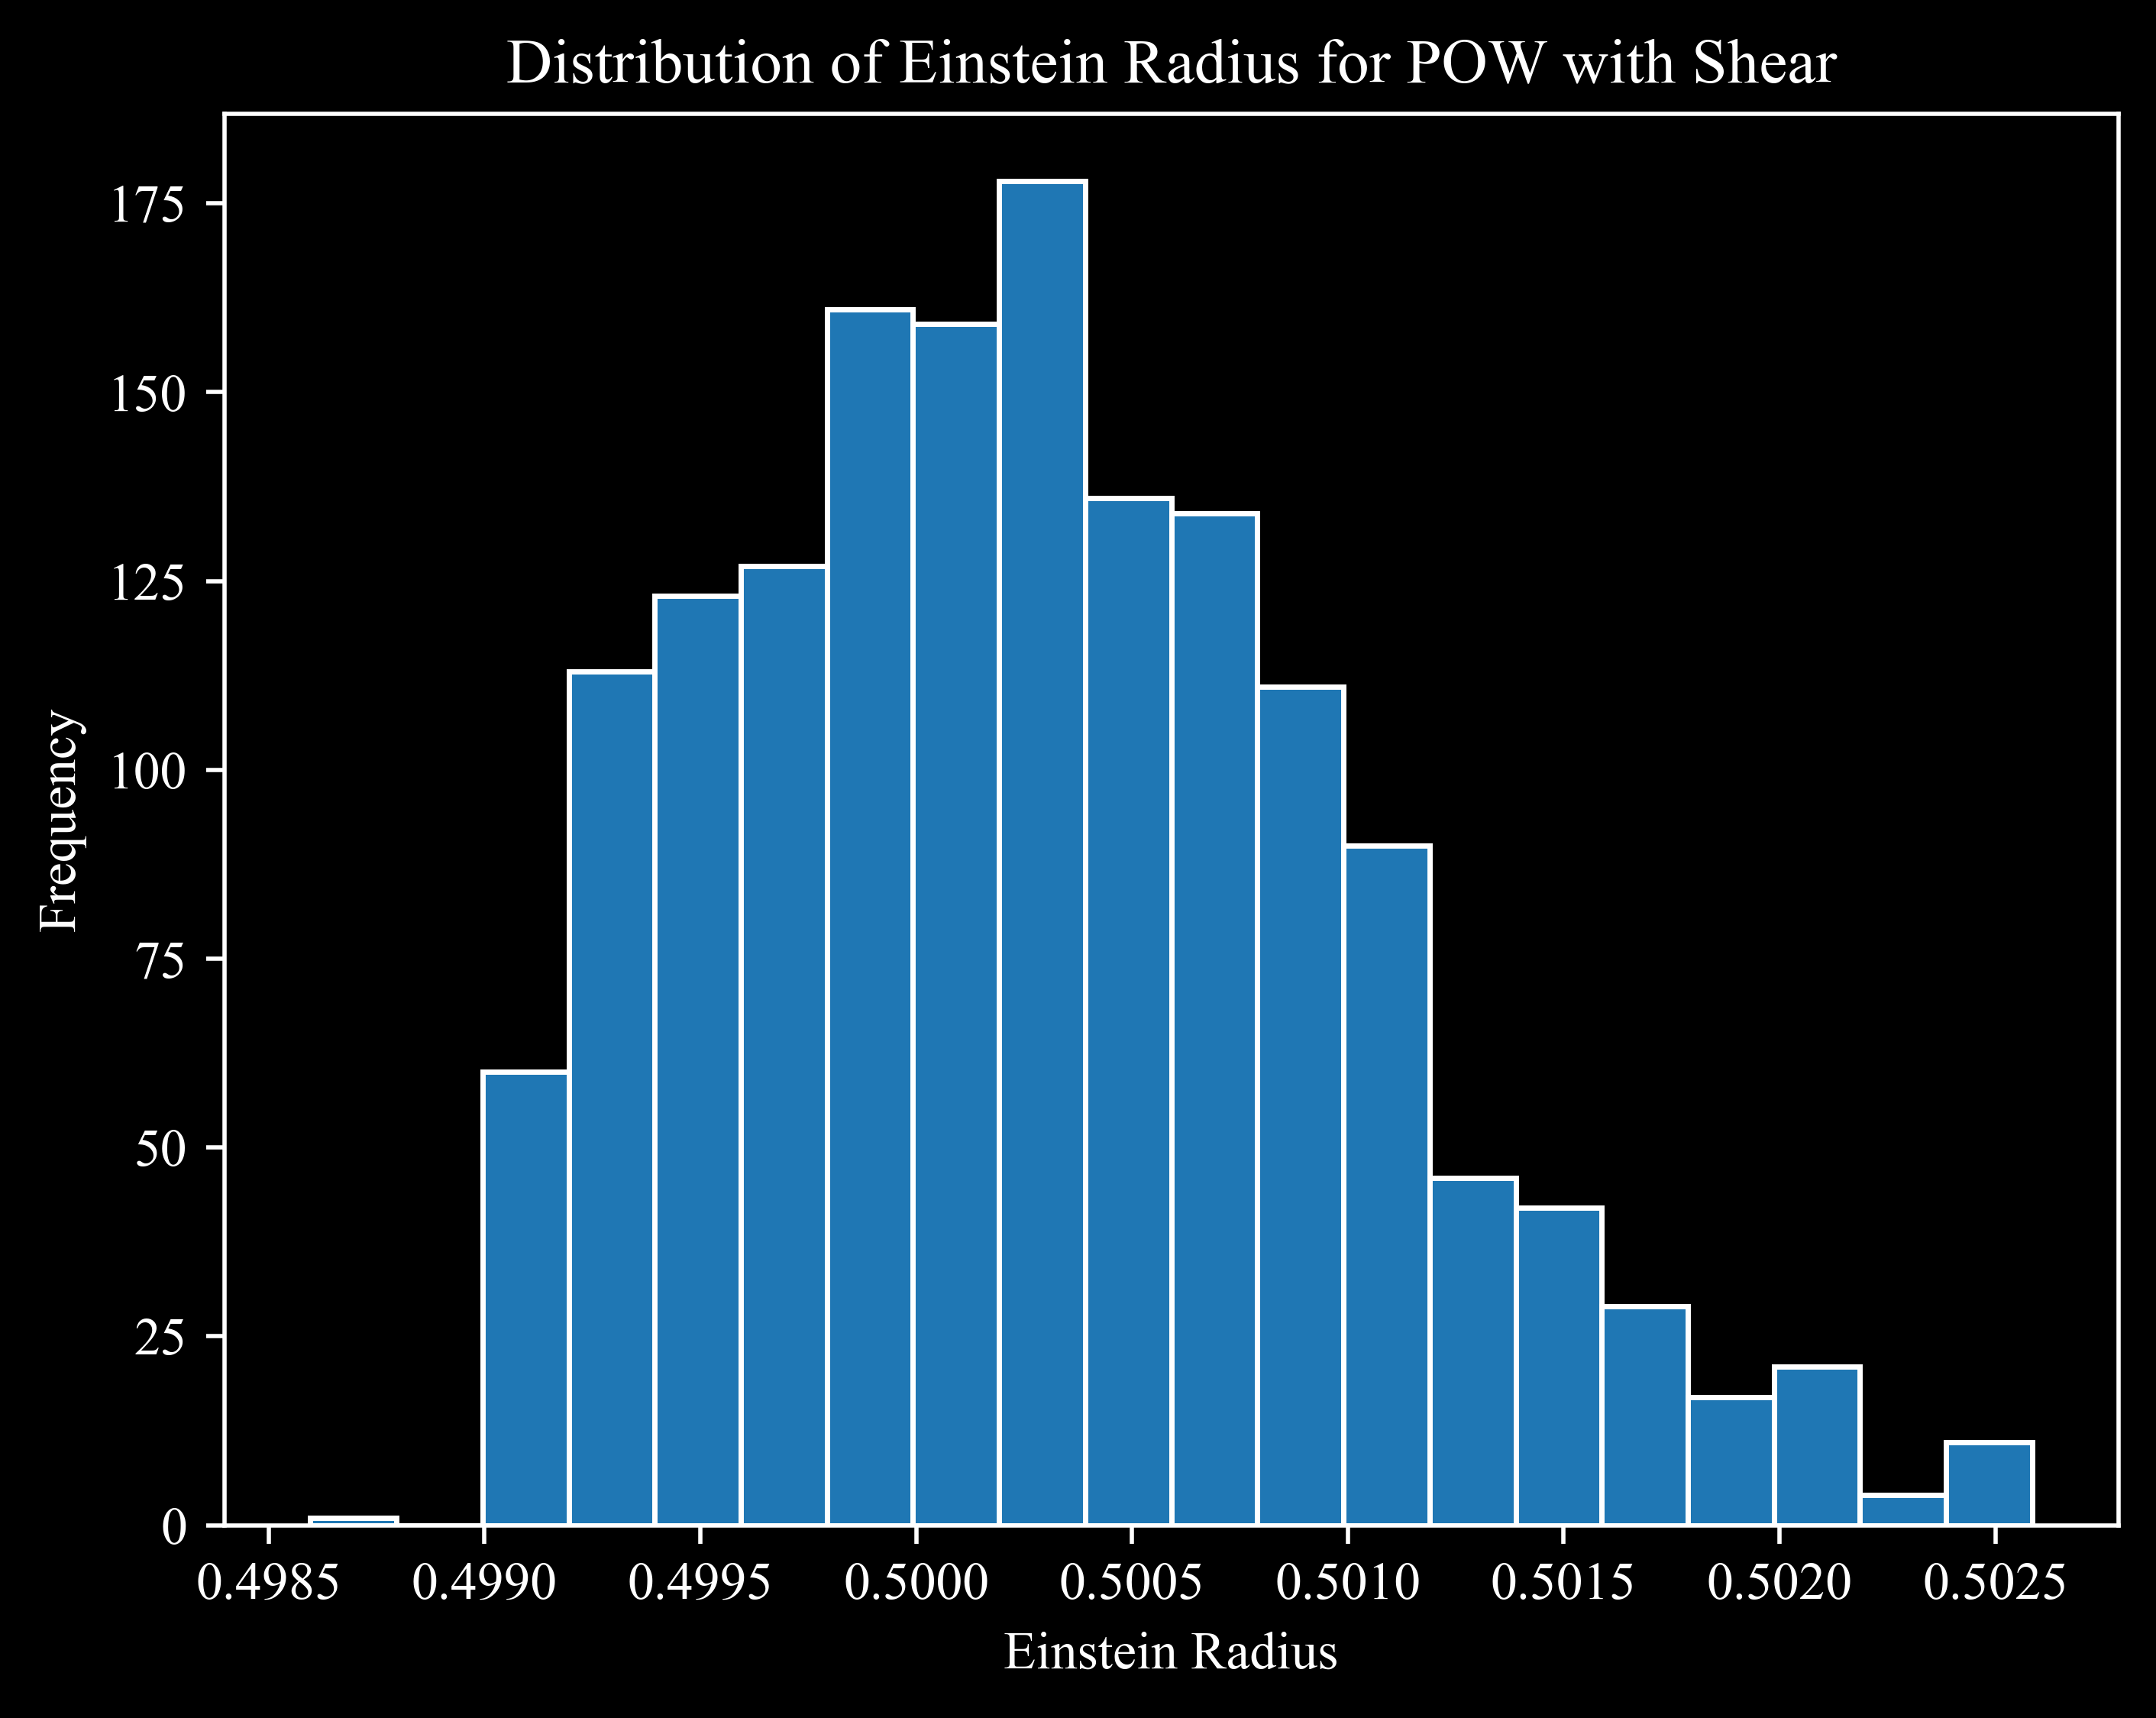

In [14]:
plt.hist(filtered_df['r_ein'], bins=20, edgecolor='w')
plt.xlabel('Einstein Radius', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of Einstein Radius for POW with Shear')
plt.show()

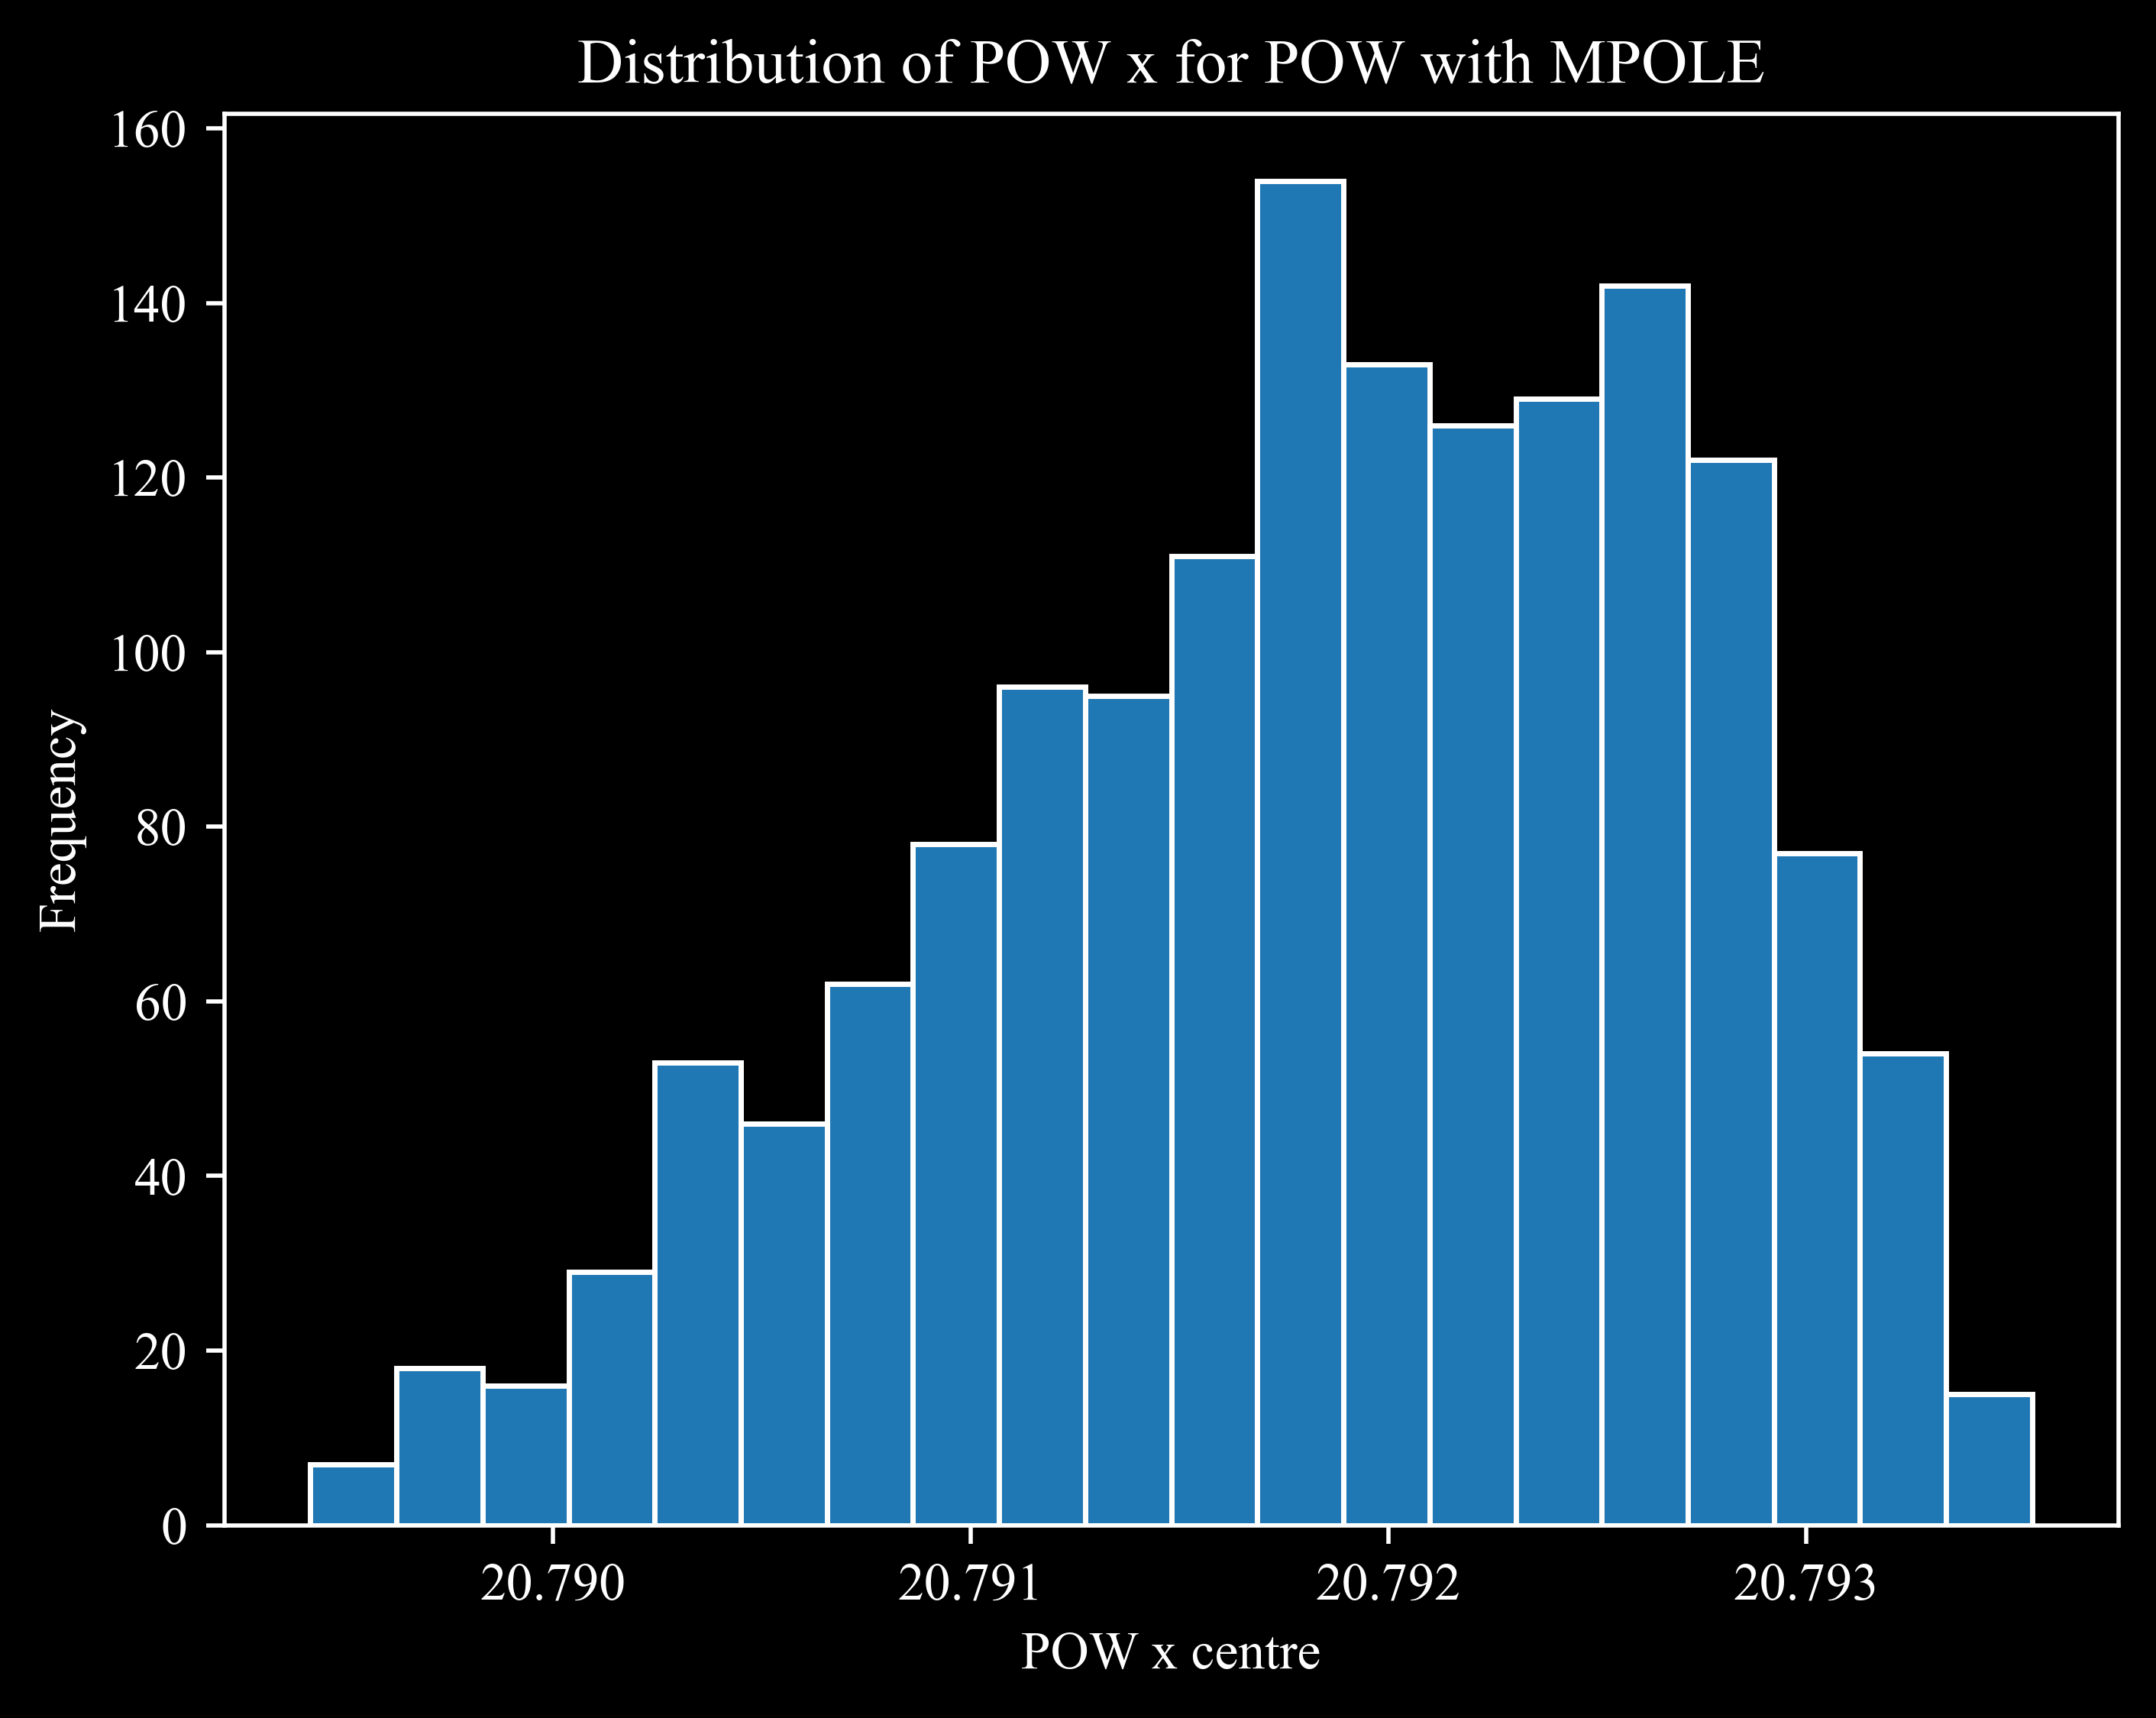

In [15]:
plt.hist(filtered_df['x'], bins=20, edgecolor='w')
plt.xlabel('POW x centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW x for POW with MPOLE')
plt.show()

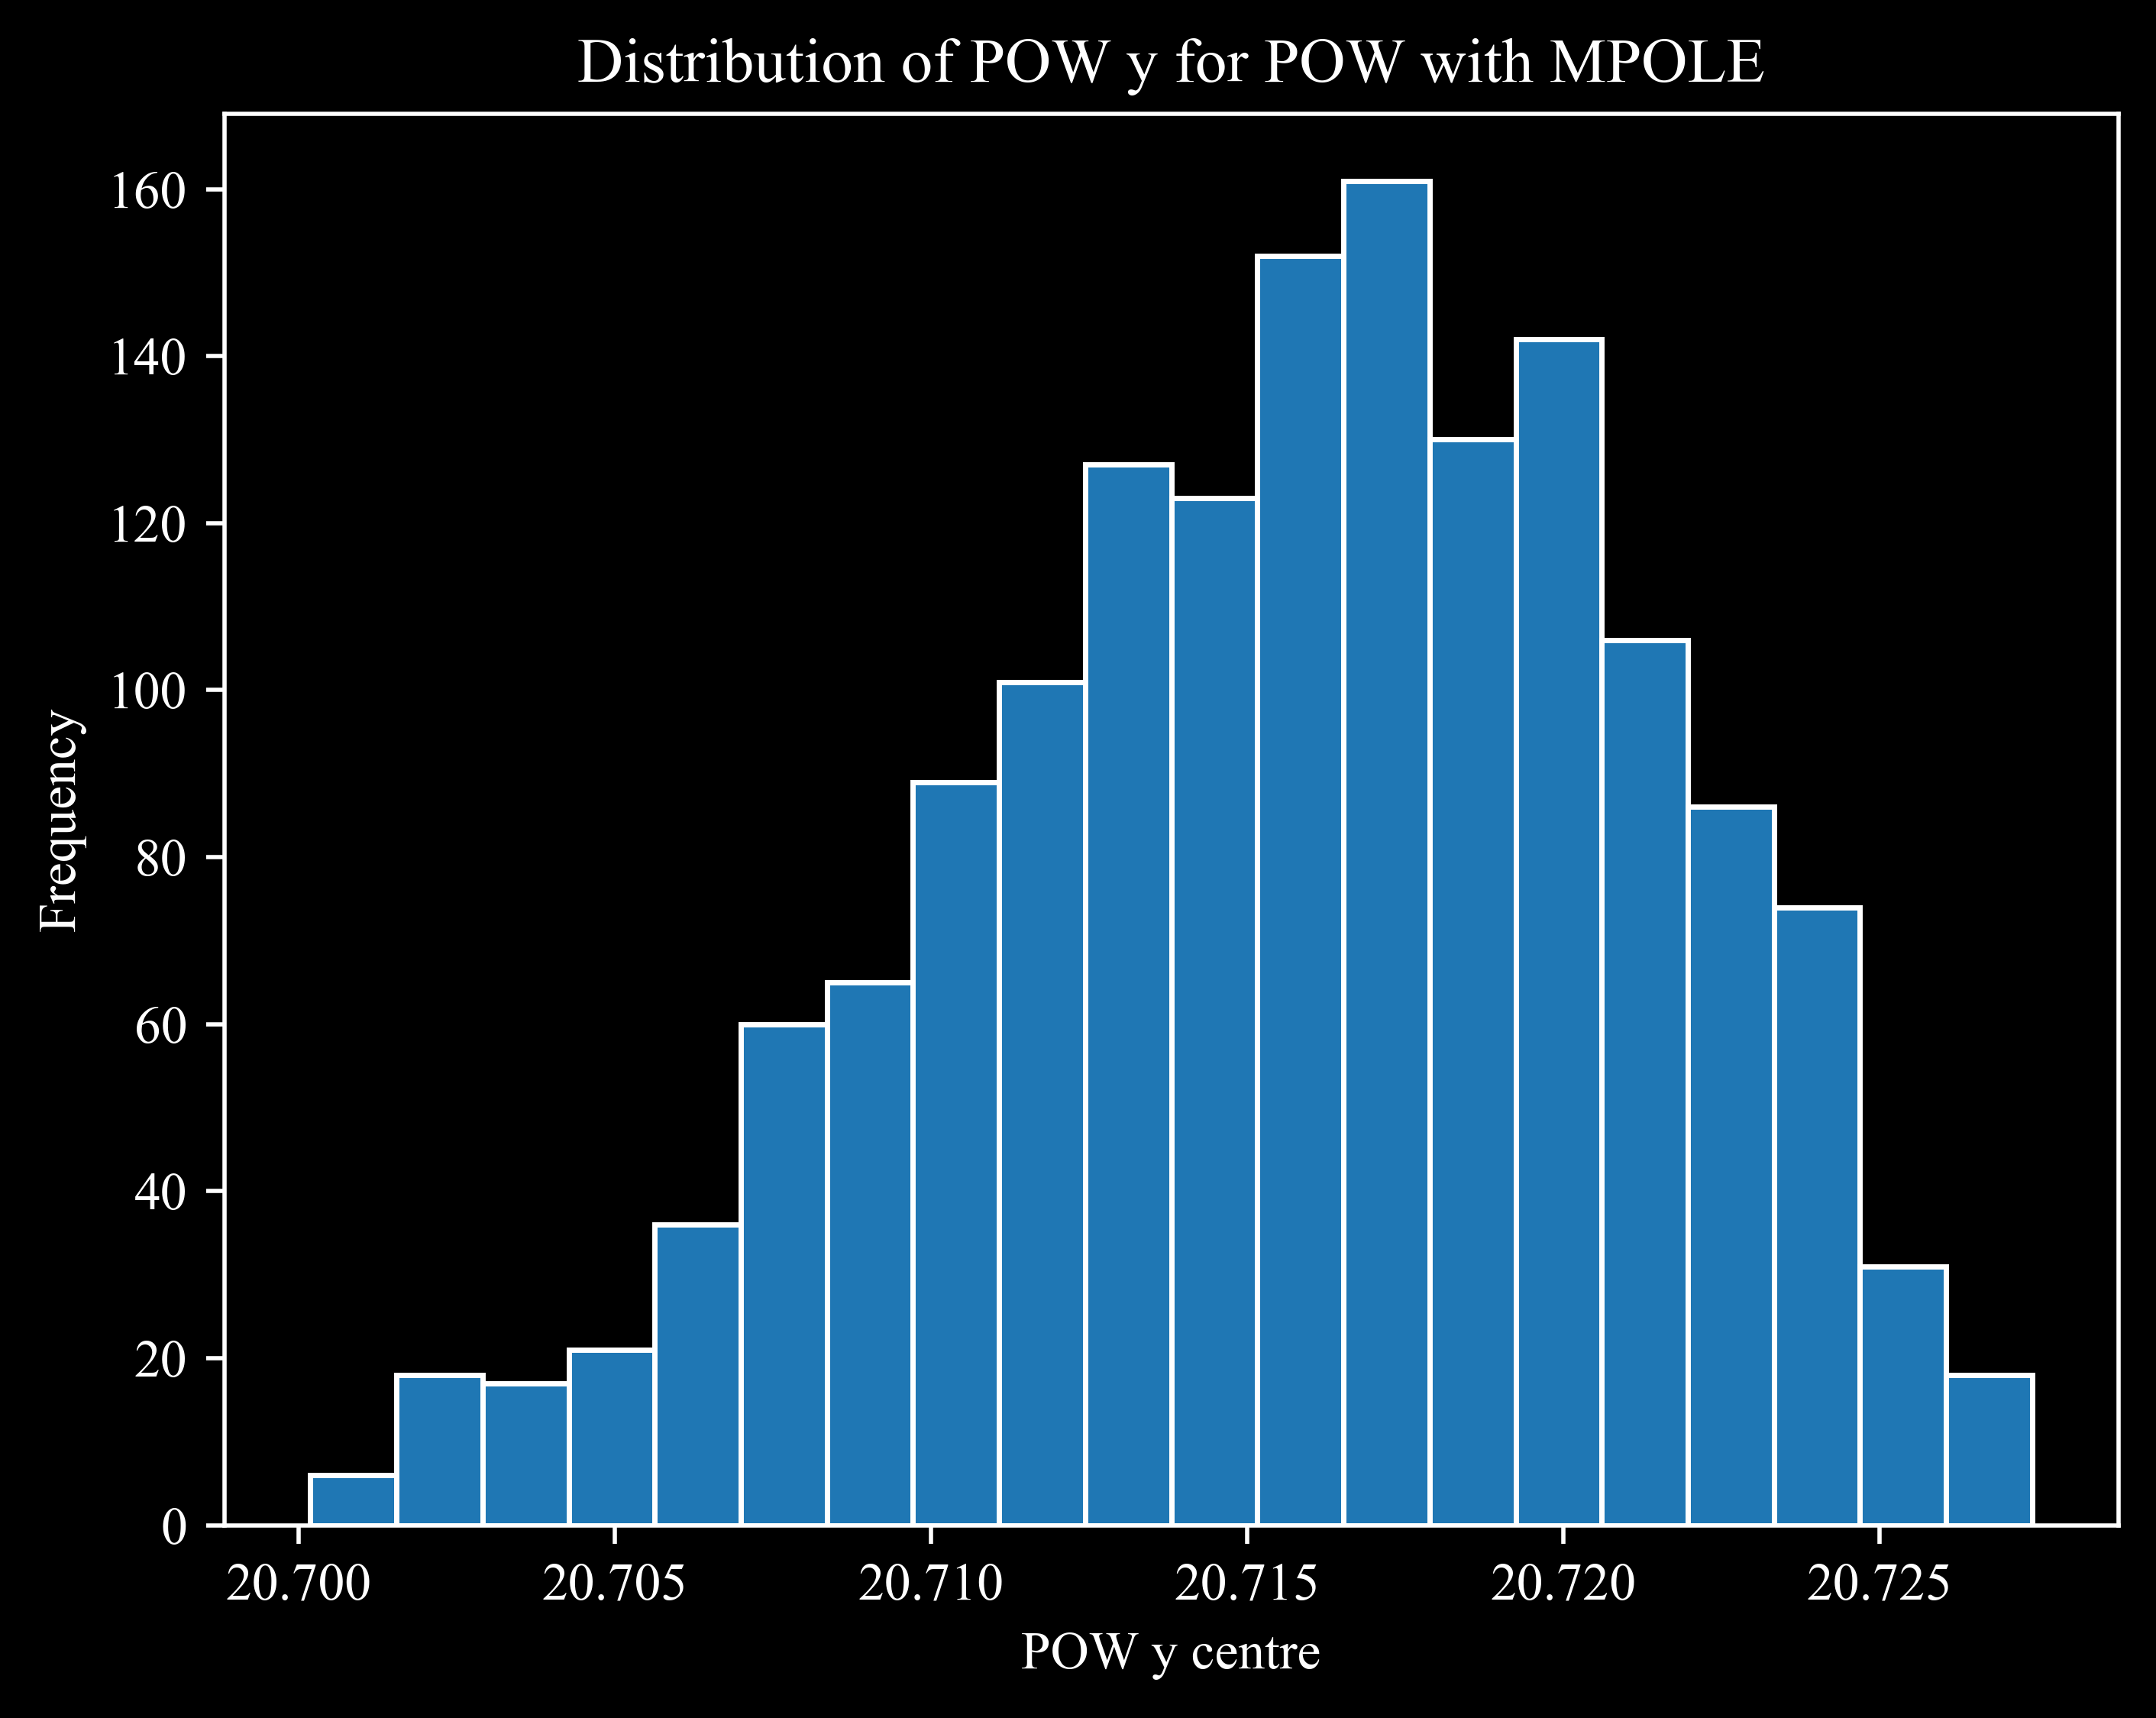

In [16]:
plt.hist(filtered_df['y'], bins=20, edgecolor='w')
plt.xlabel('POW y centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW y for POW with MPOLE')
plt.show()

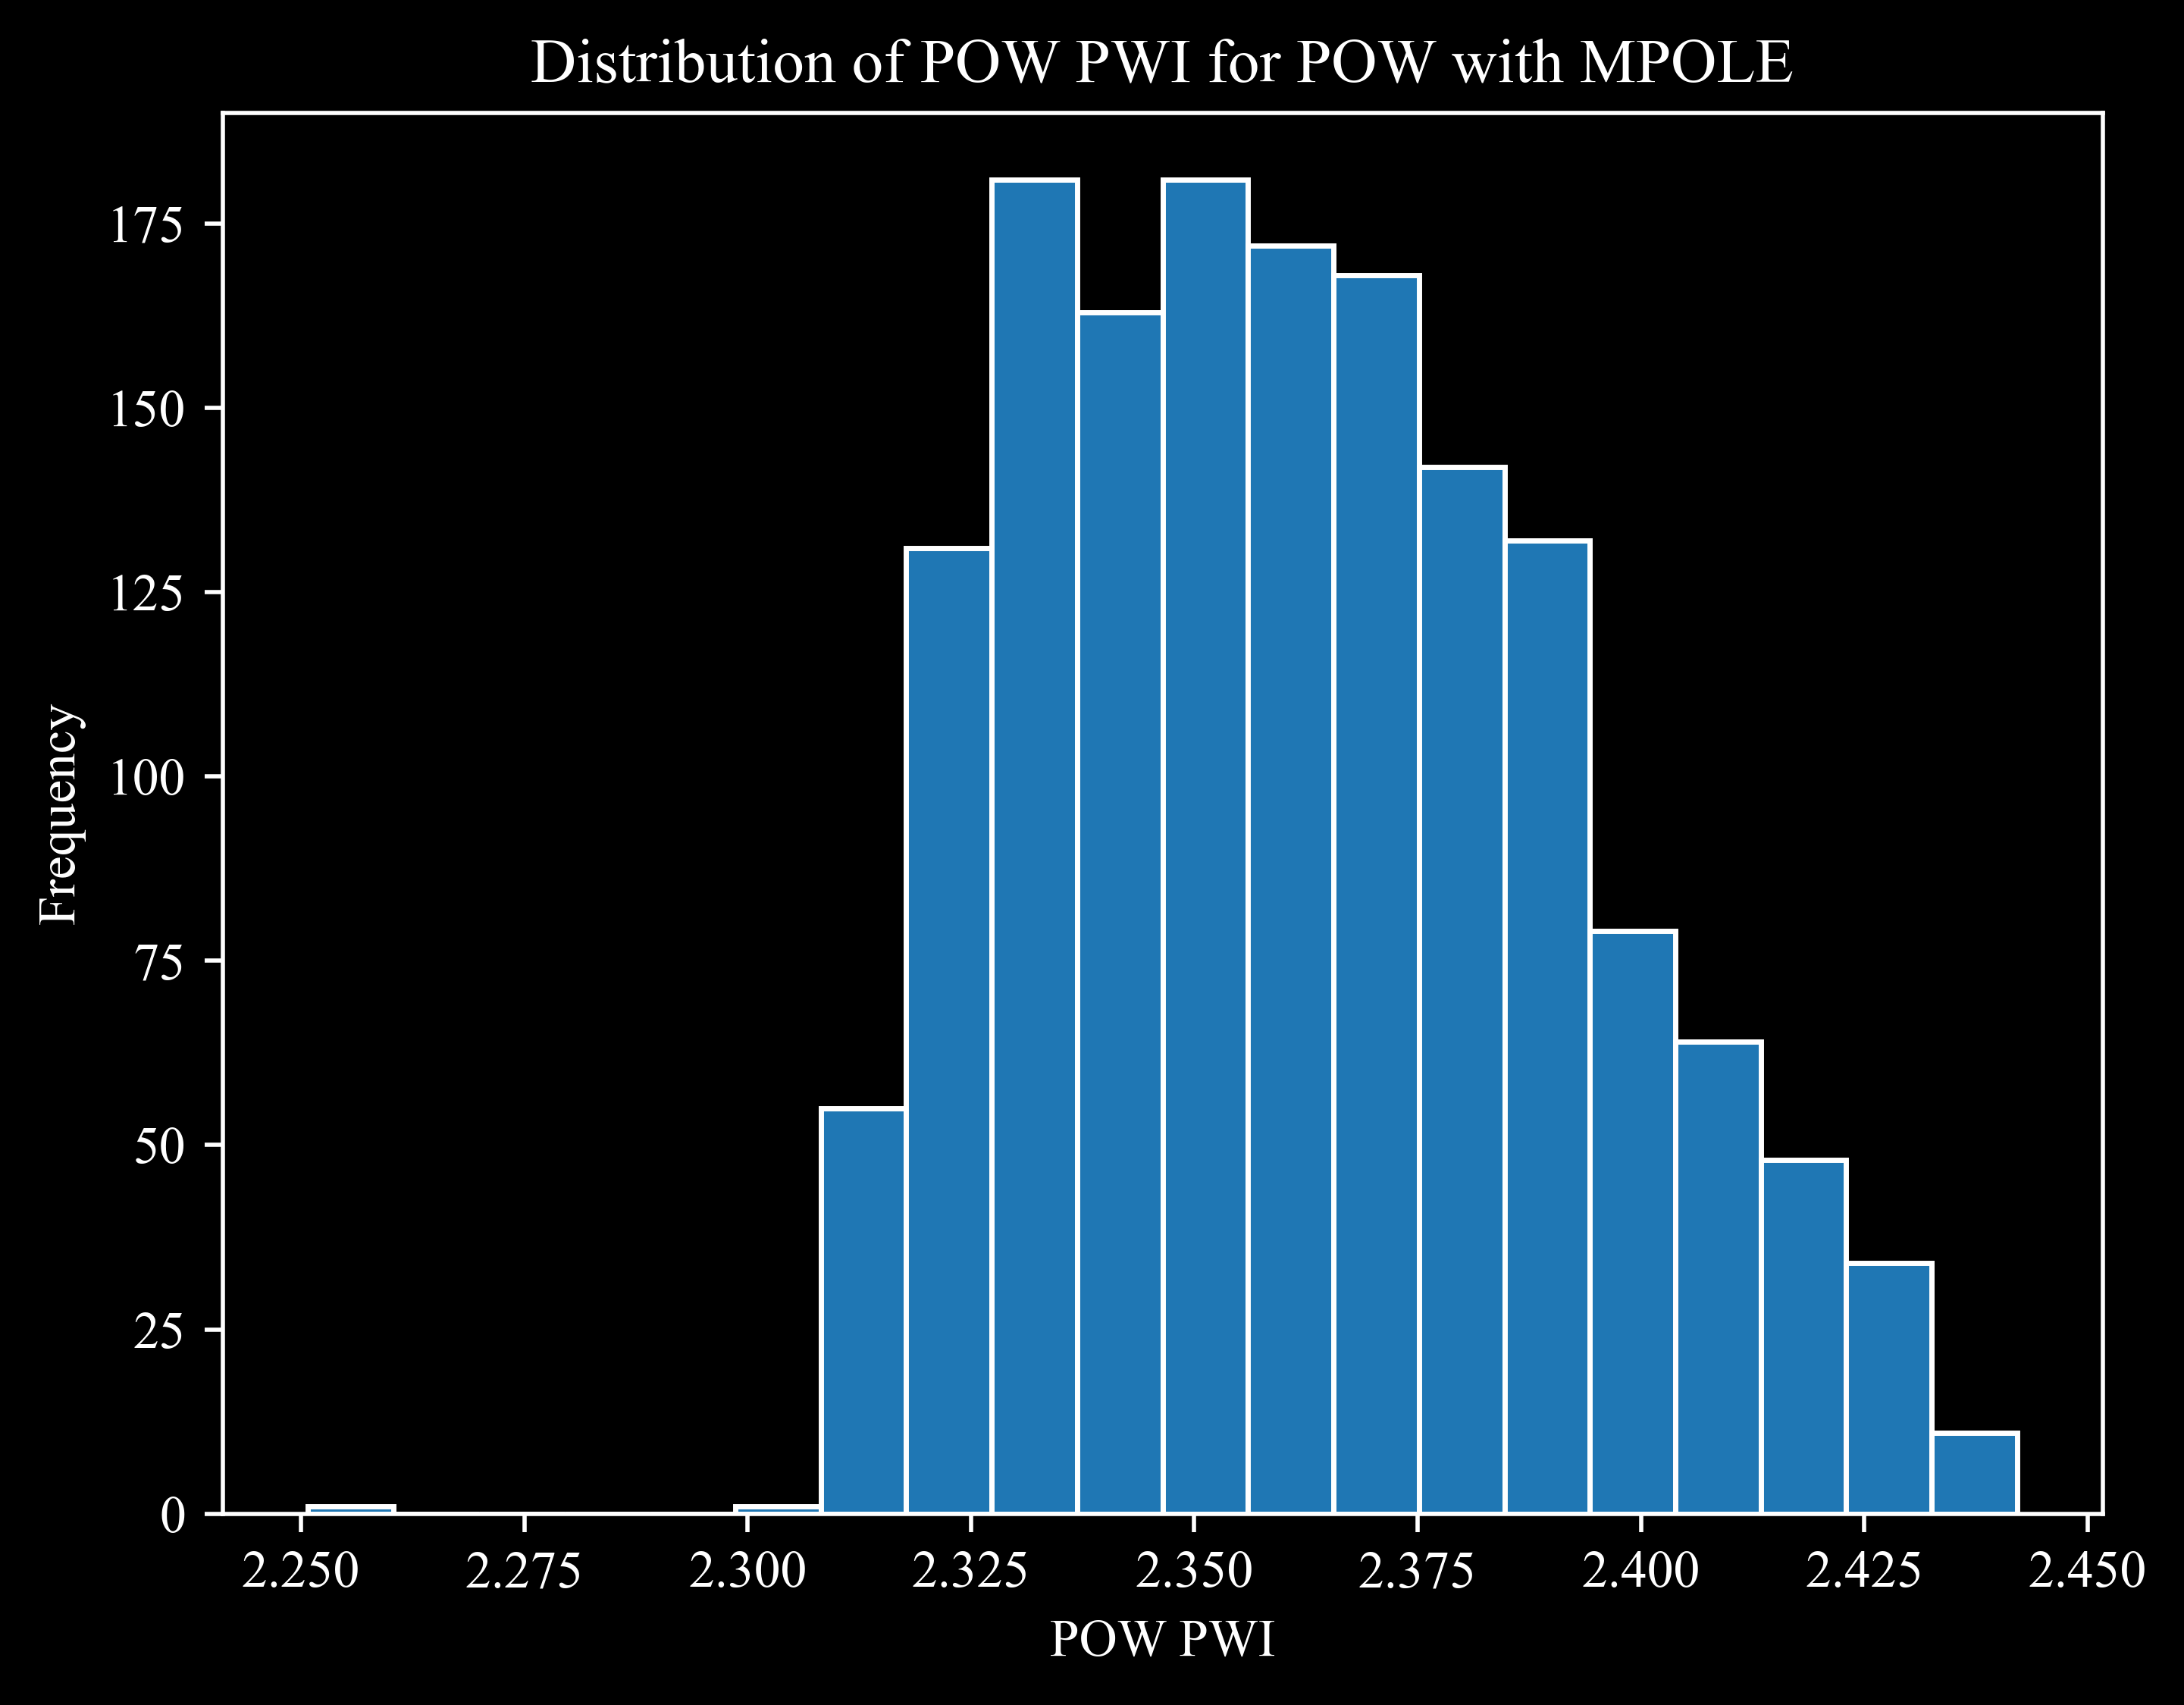

In [17]:
plt.hist(filtered_df['pwi'], bins=20, edgecolor='w')
plt.xlabel('POW PWI', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW PWI for POW with MPOLE')
plt.show()

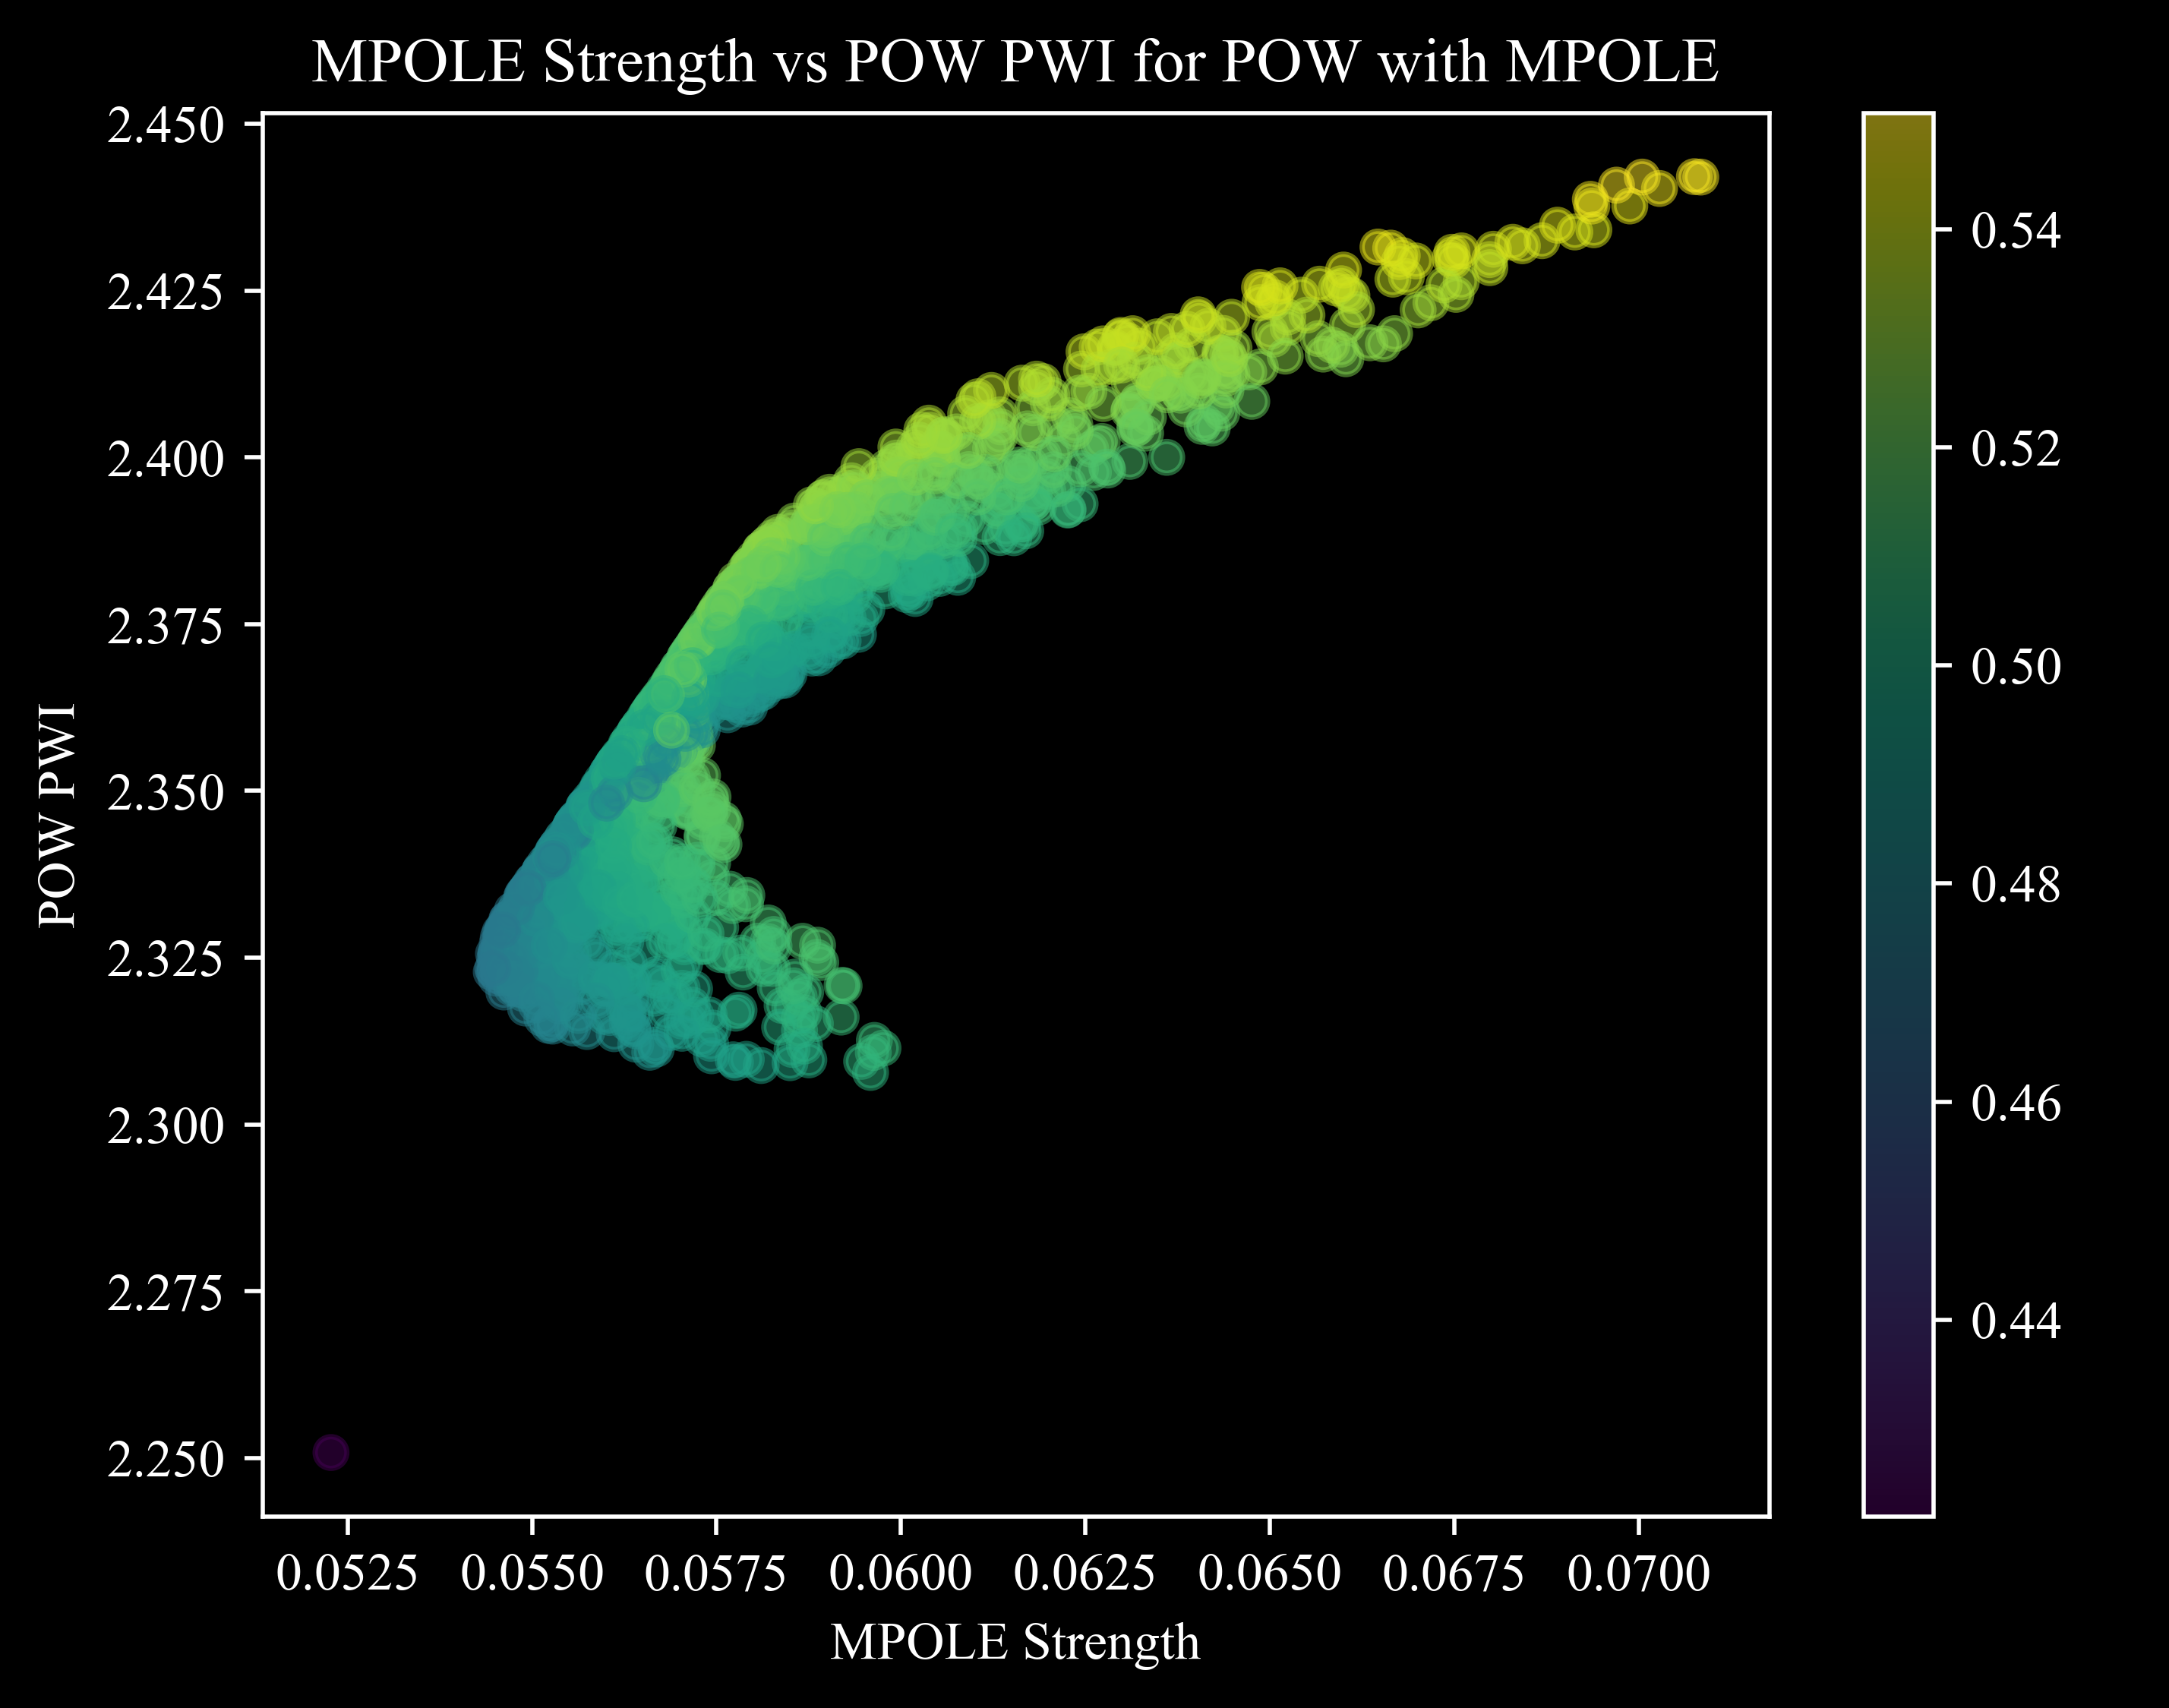

In [18]:
plt.scatter(filtered_df['t_mpole_str'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.5)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('POW PWI', color = 'w')
plt.title('MPOLE Strength vs POW PWI for POW with MPOLE')
plt.show()

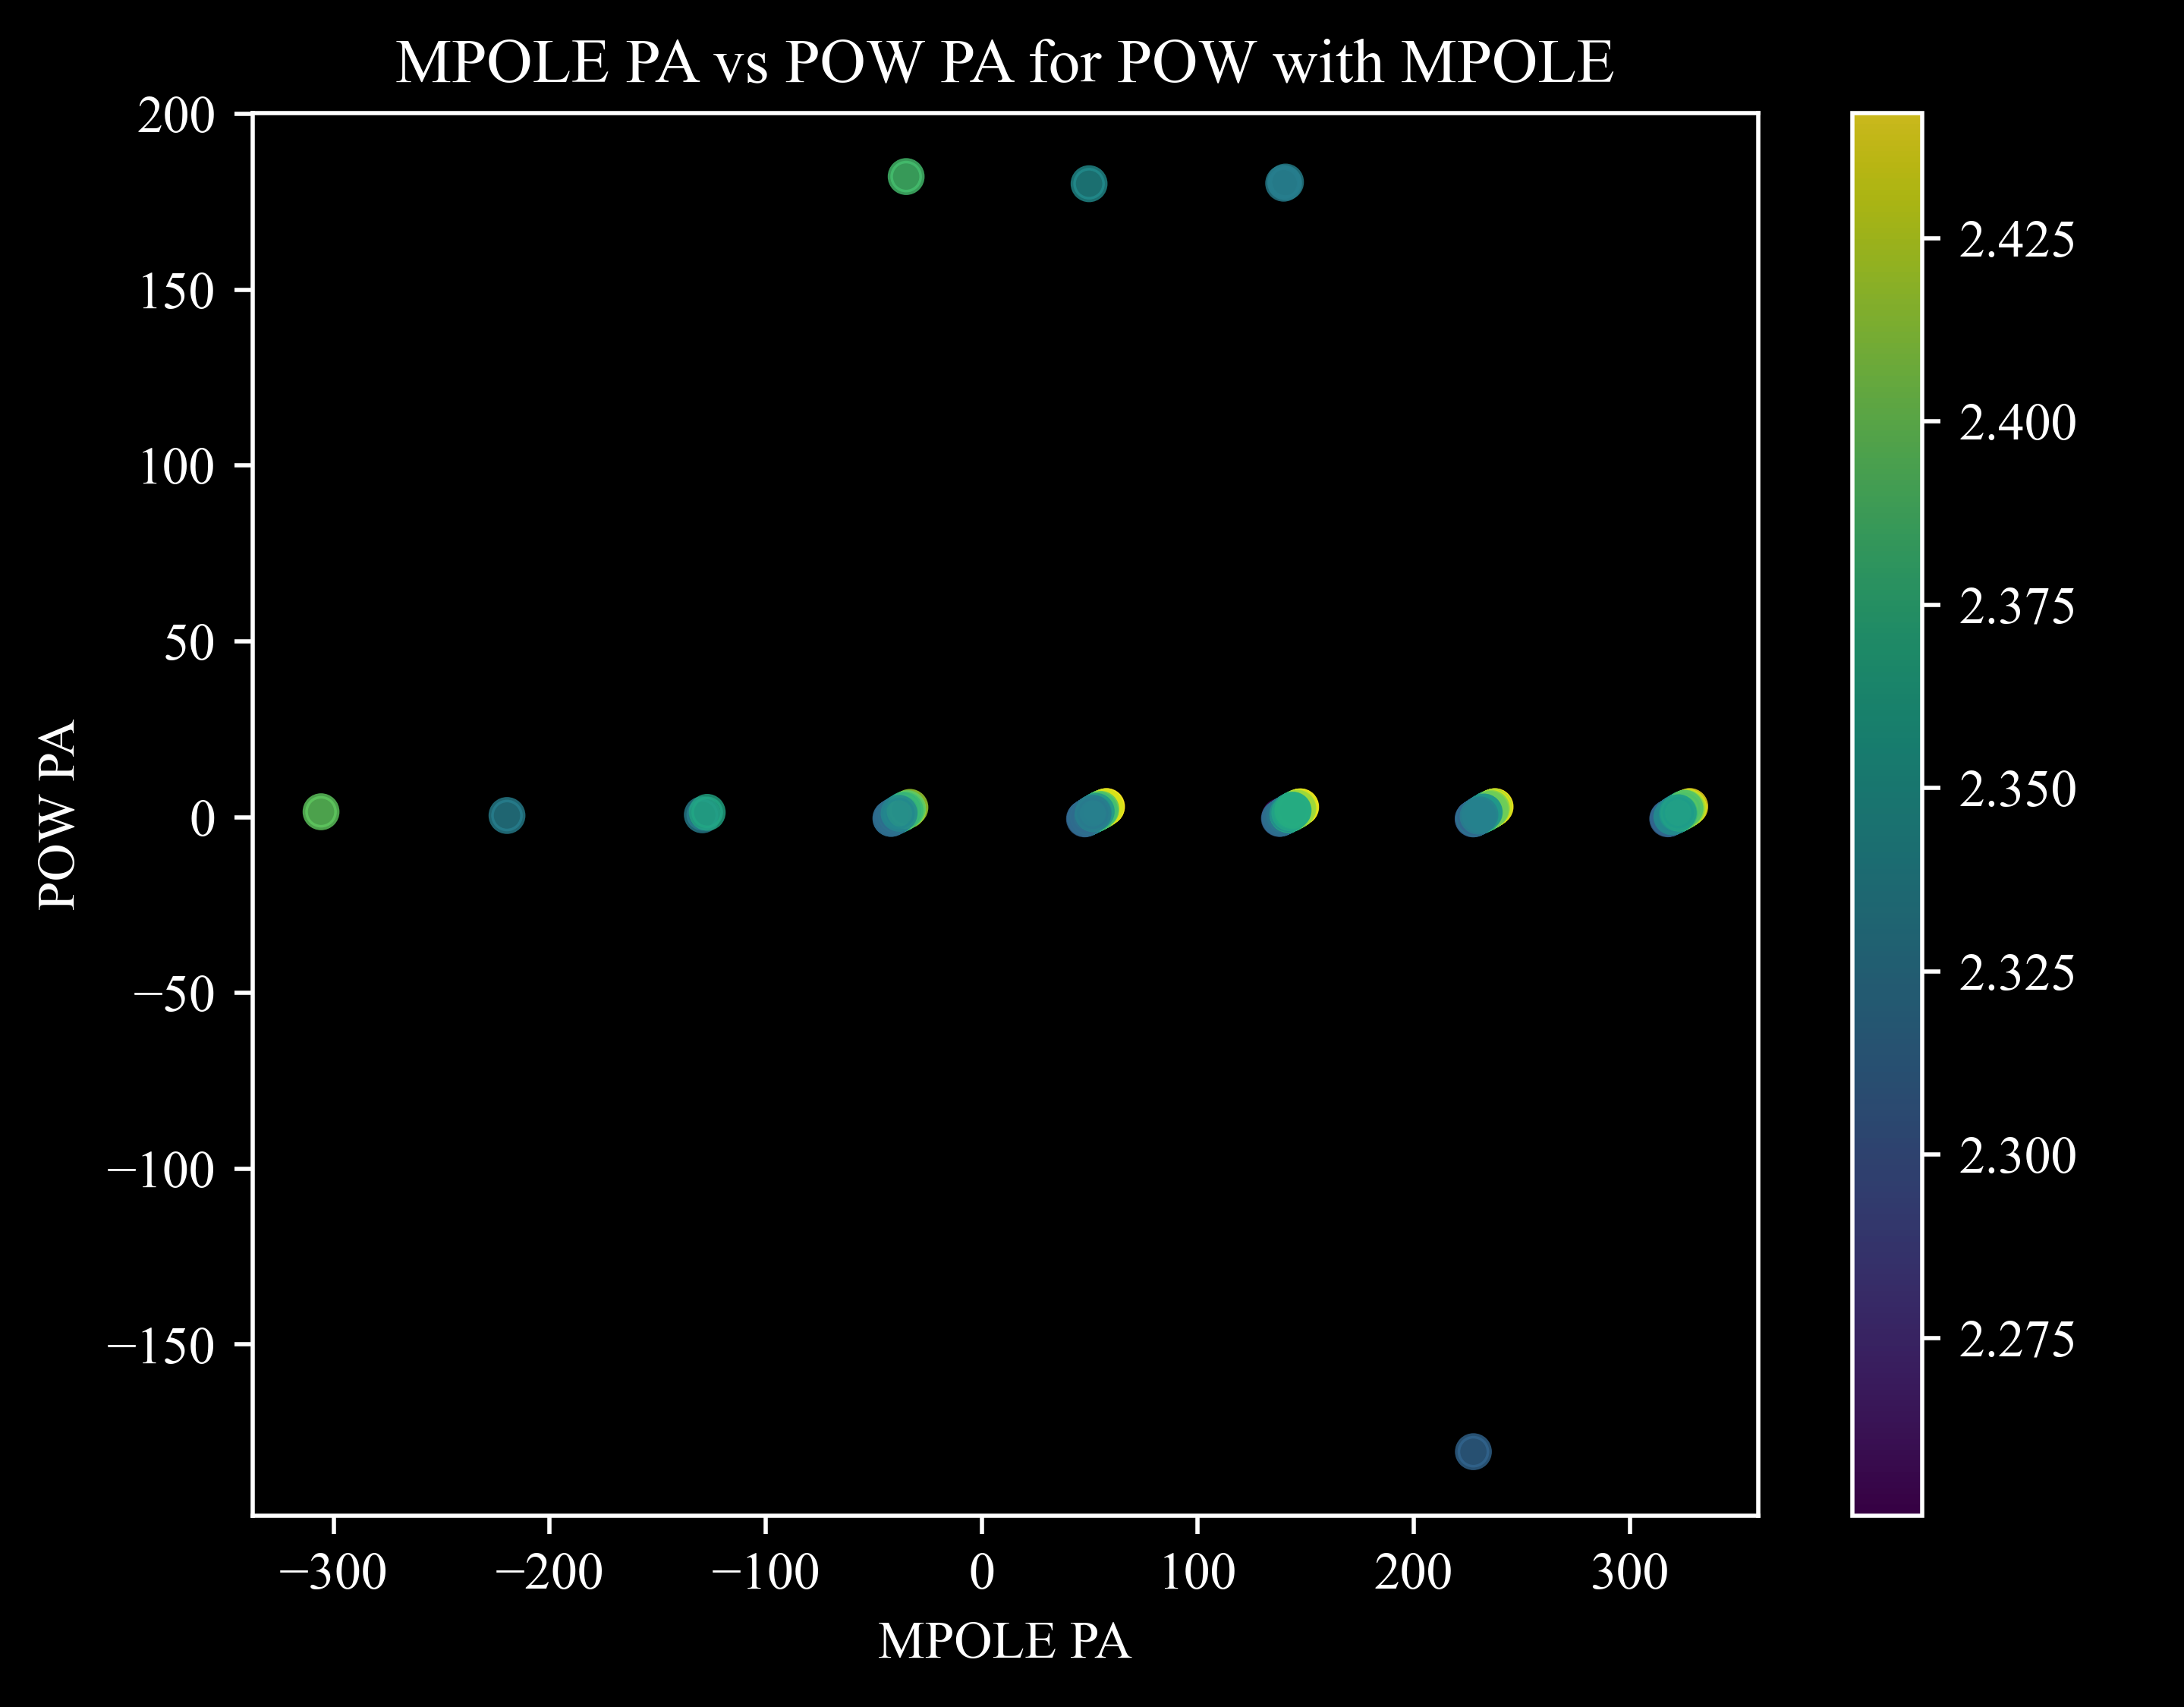

In [19]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['pow_pa'], c=filtered_df['pwi'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('POW PA', color = 'w')
plt.title('MPOLE PA vs POW PA for POW with MPOLE')
plt.show()

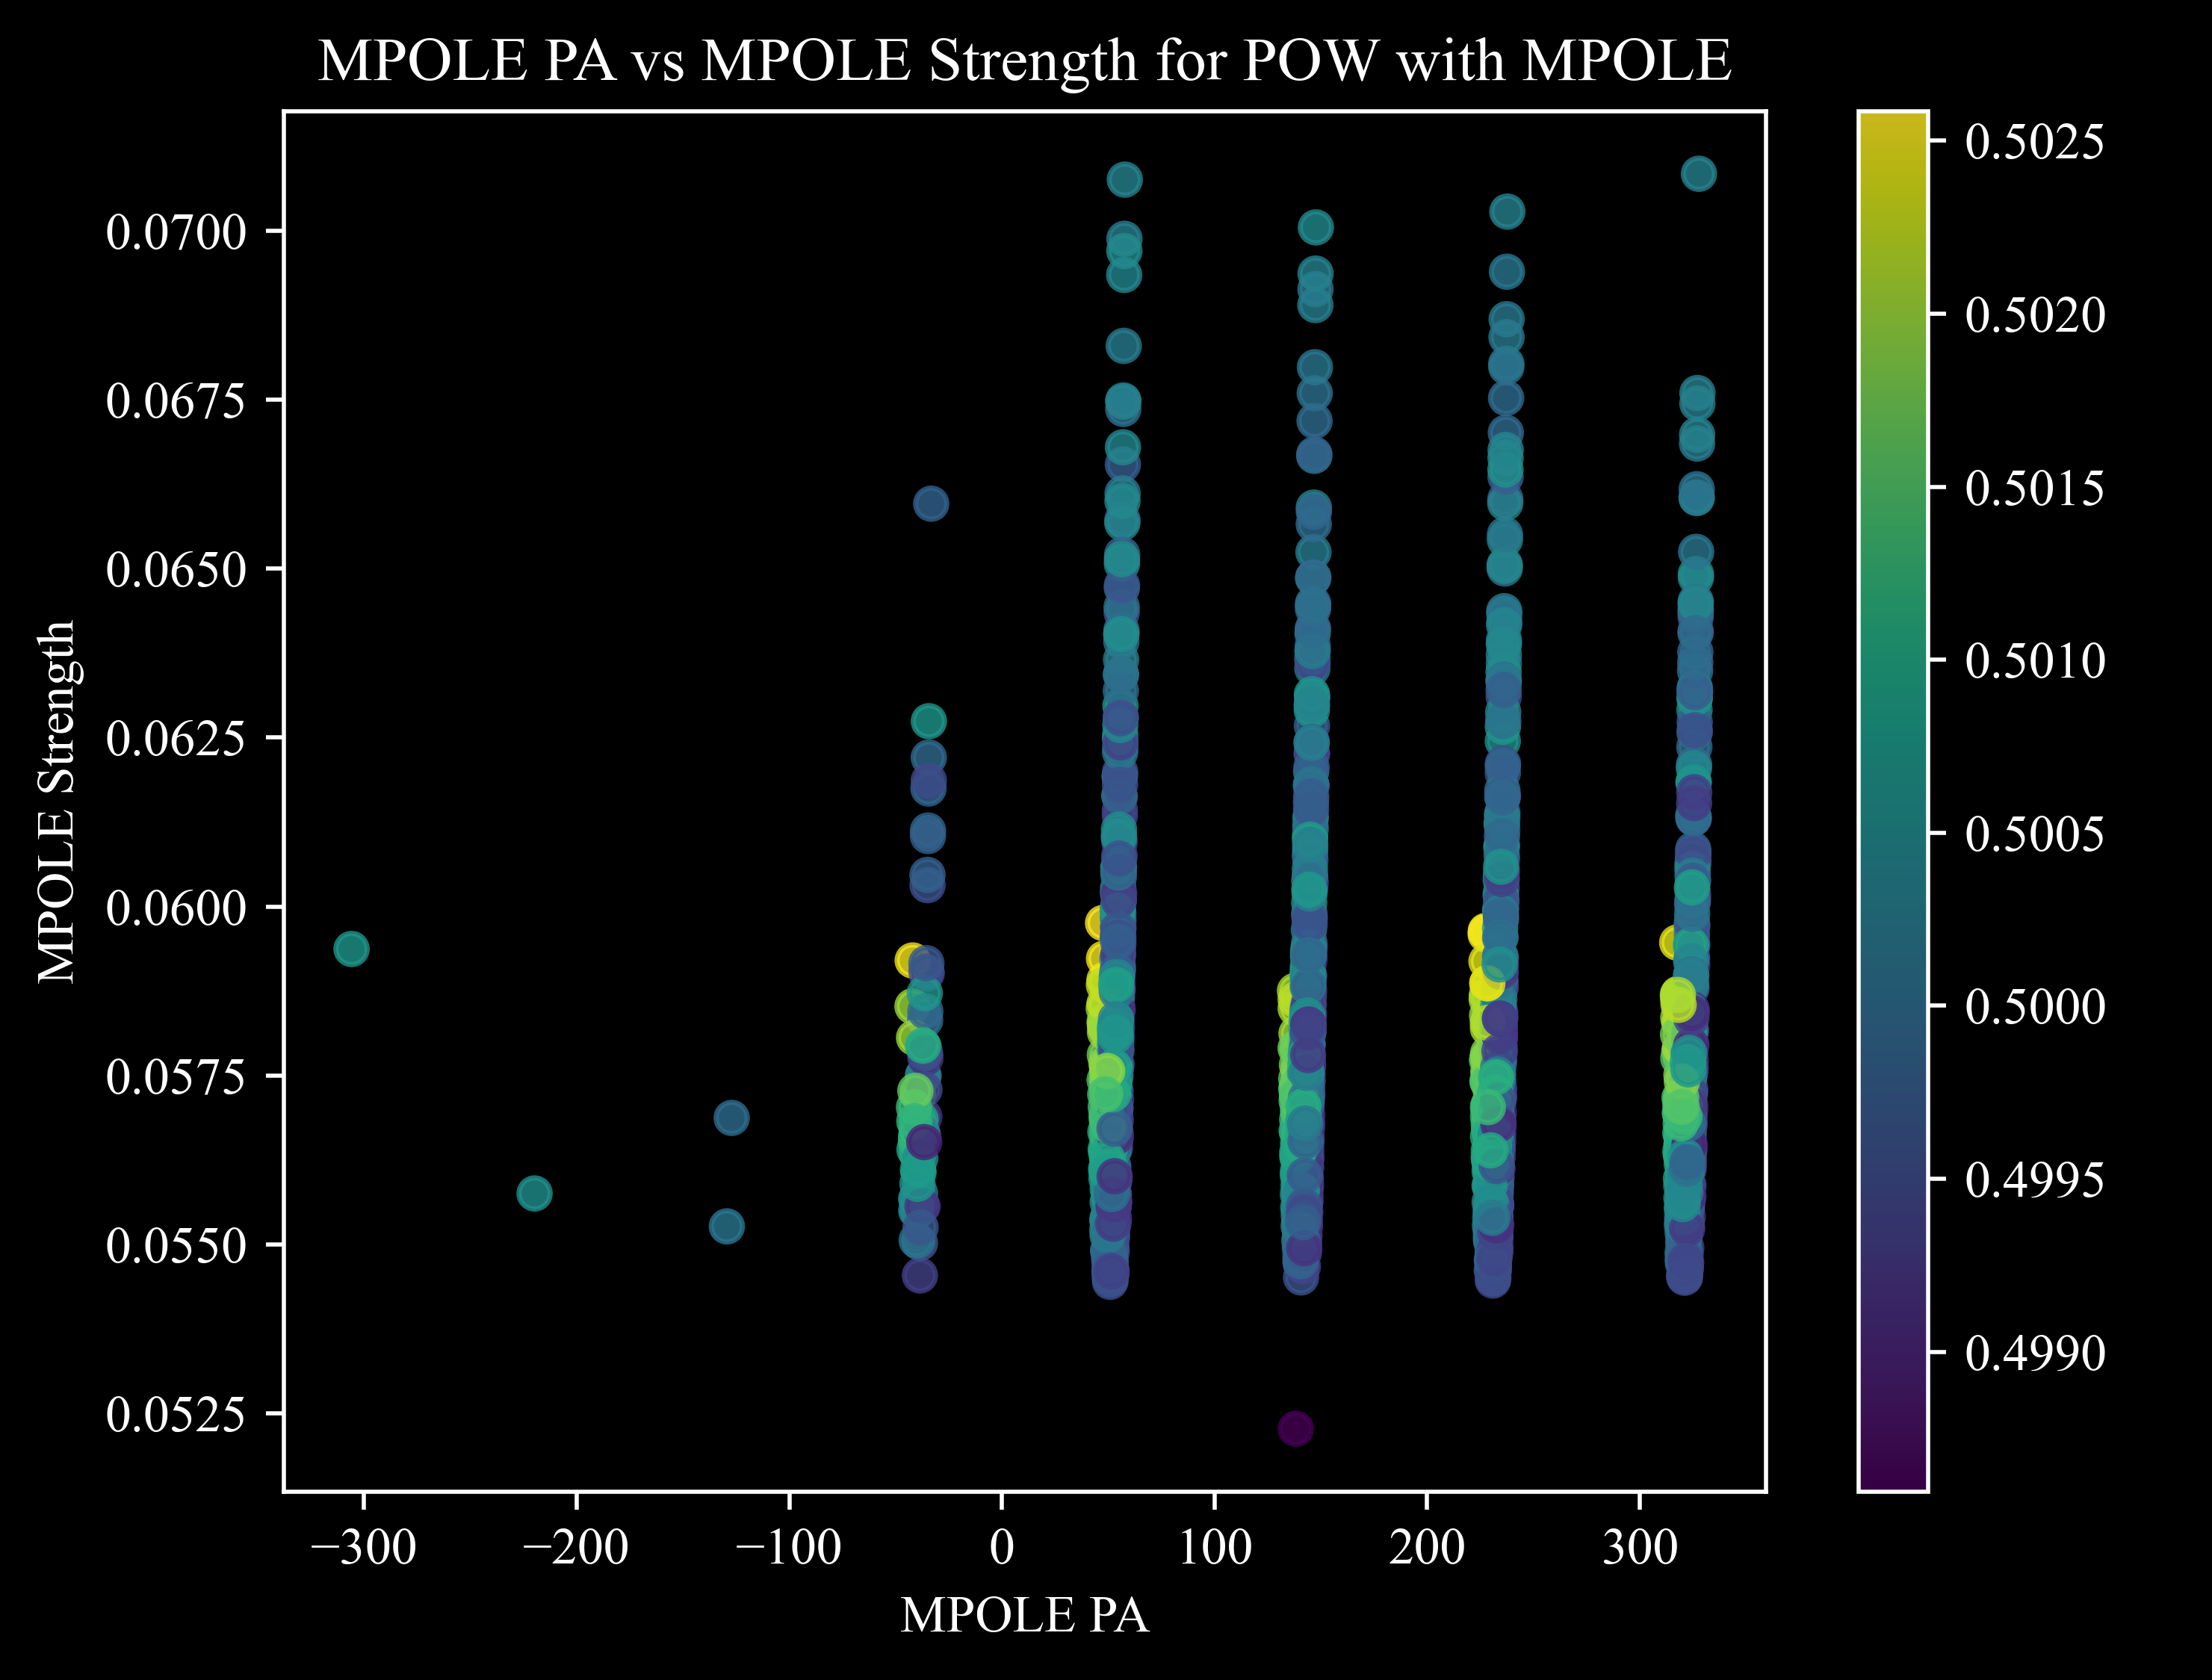

In [20]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['t_mpole_str'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('MPOLE Strength', color = 'w')
plt.title('MPOLE PA vs MPOLE Strength for POW with MPOLE')
plt.show()

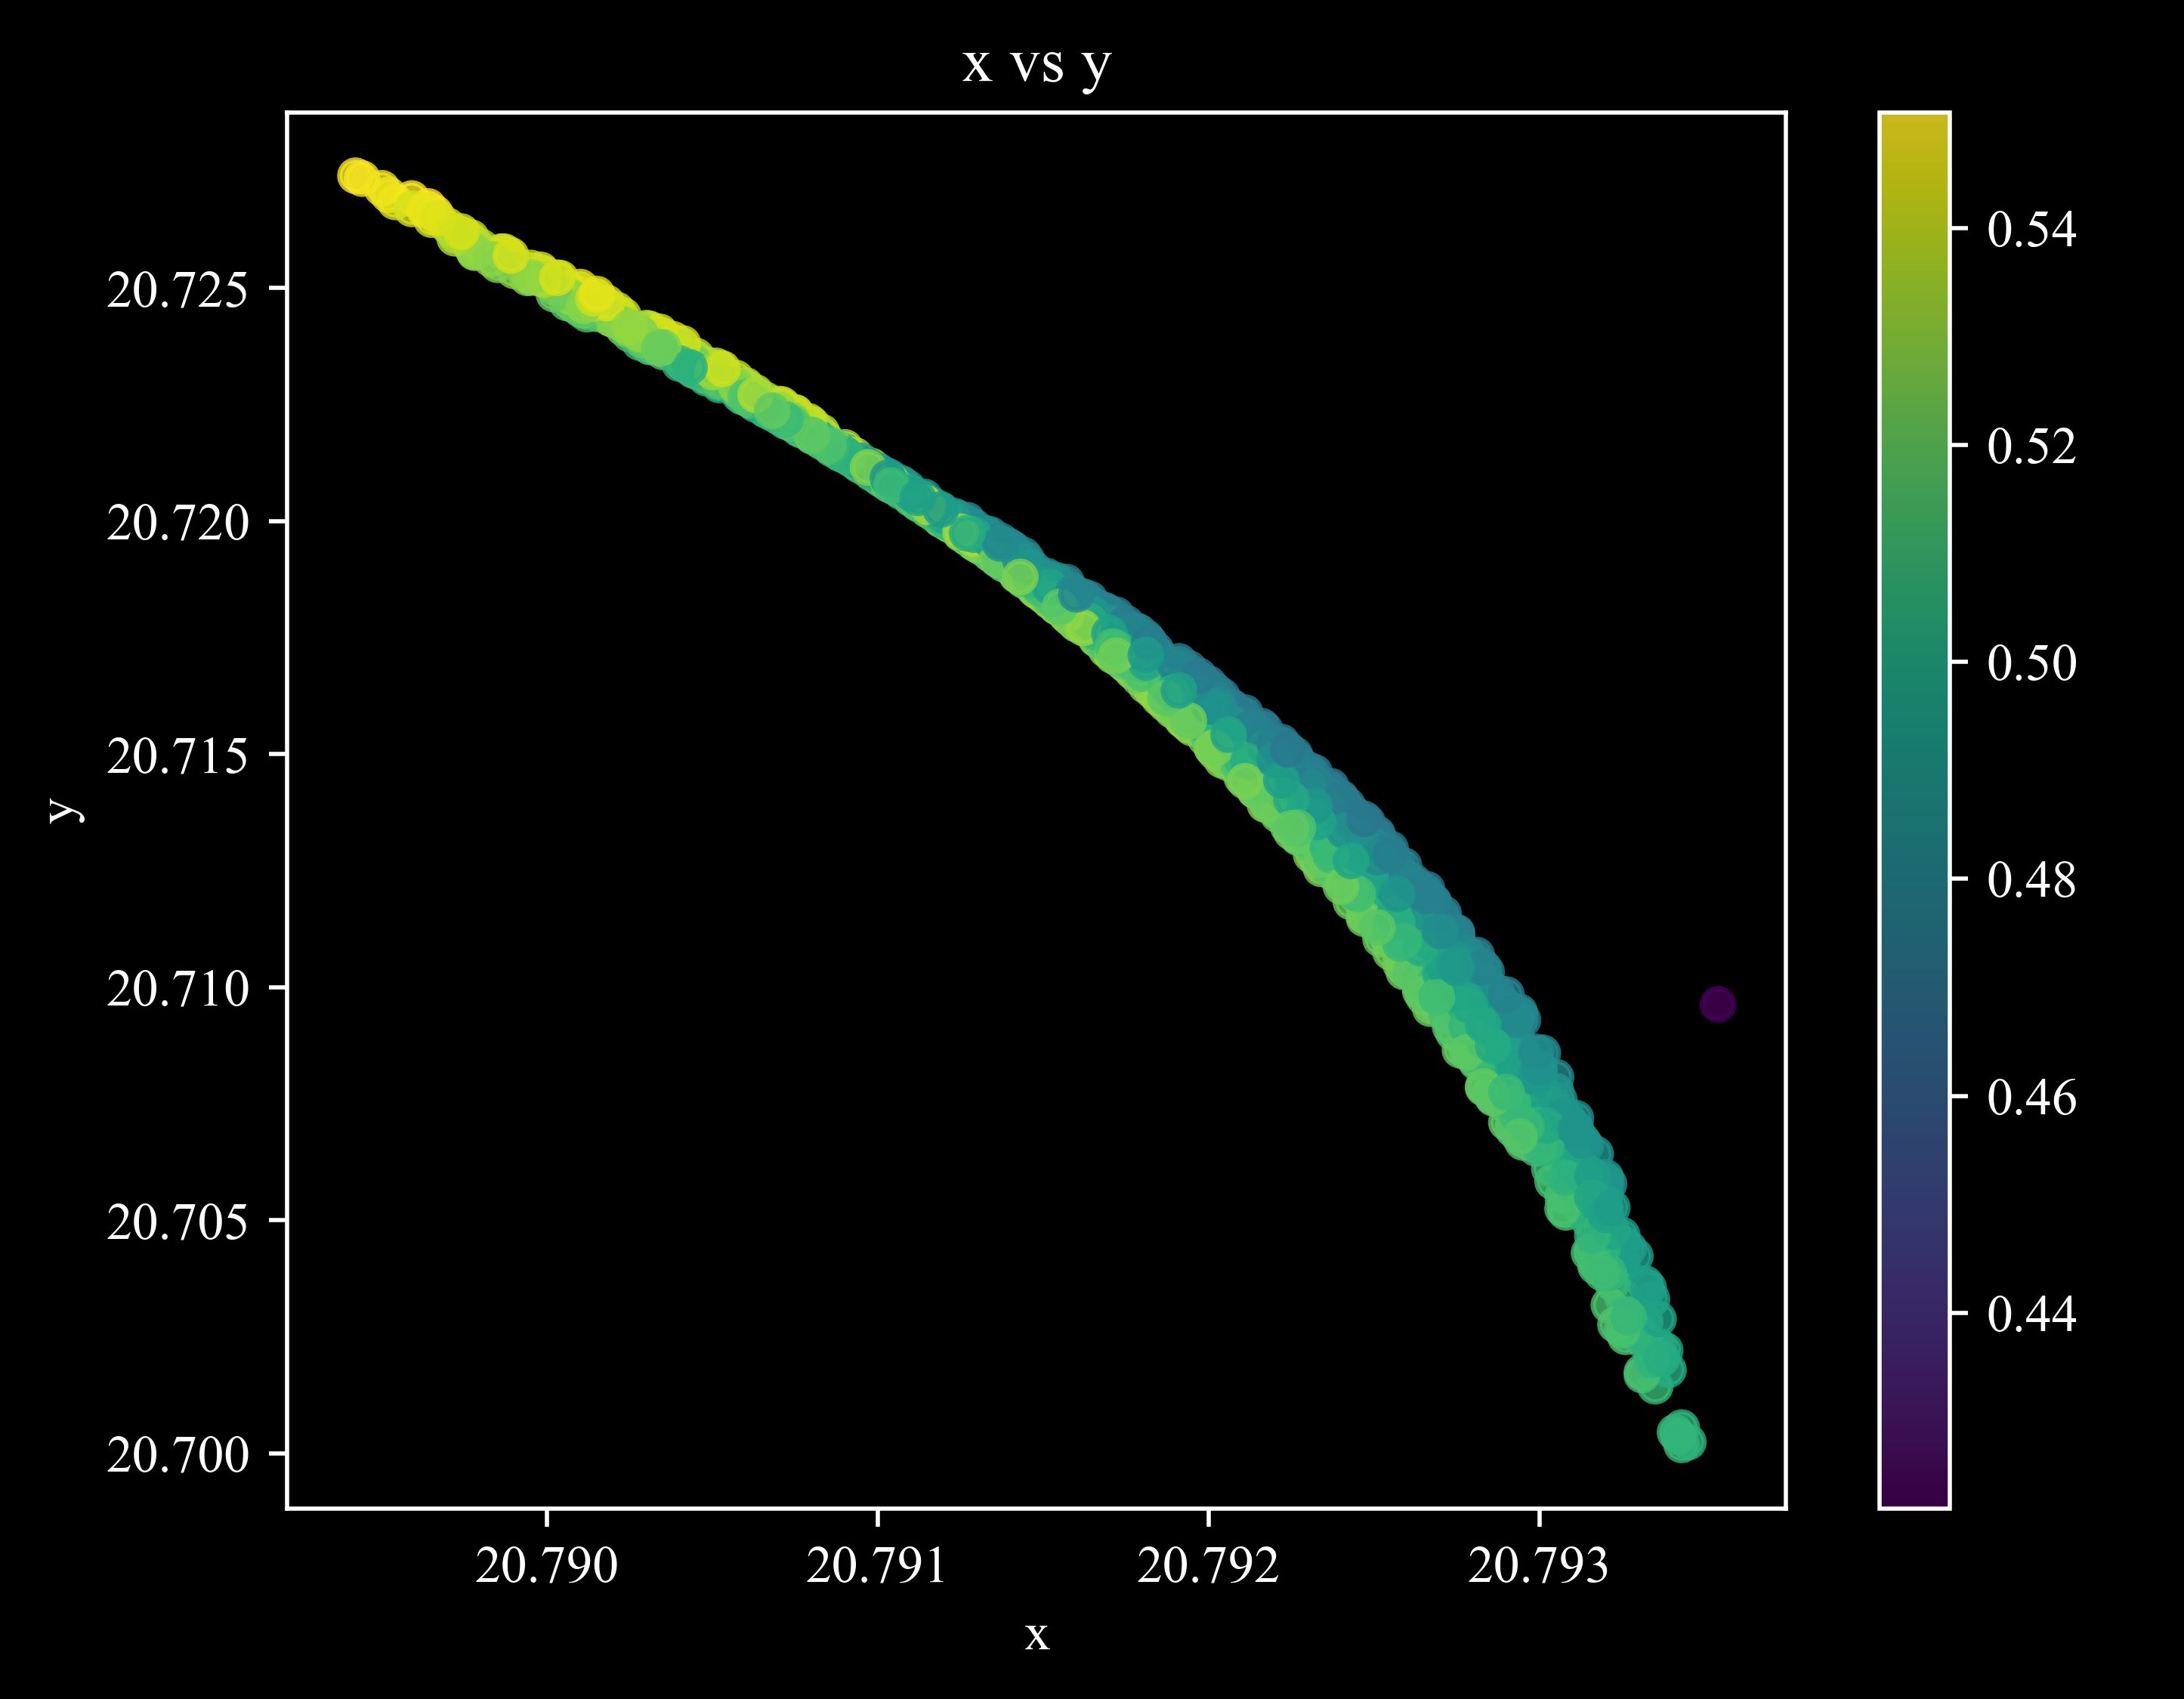

In [21]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

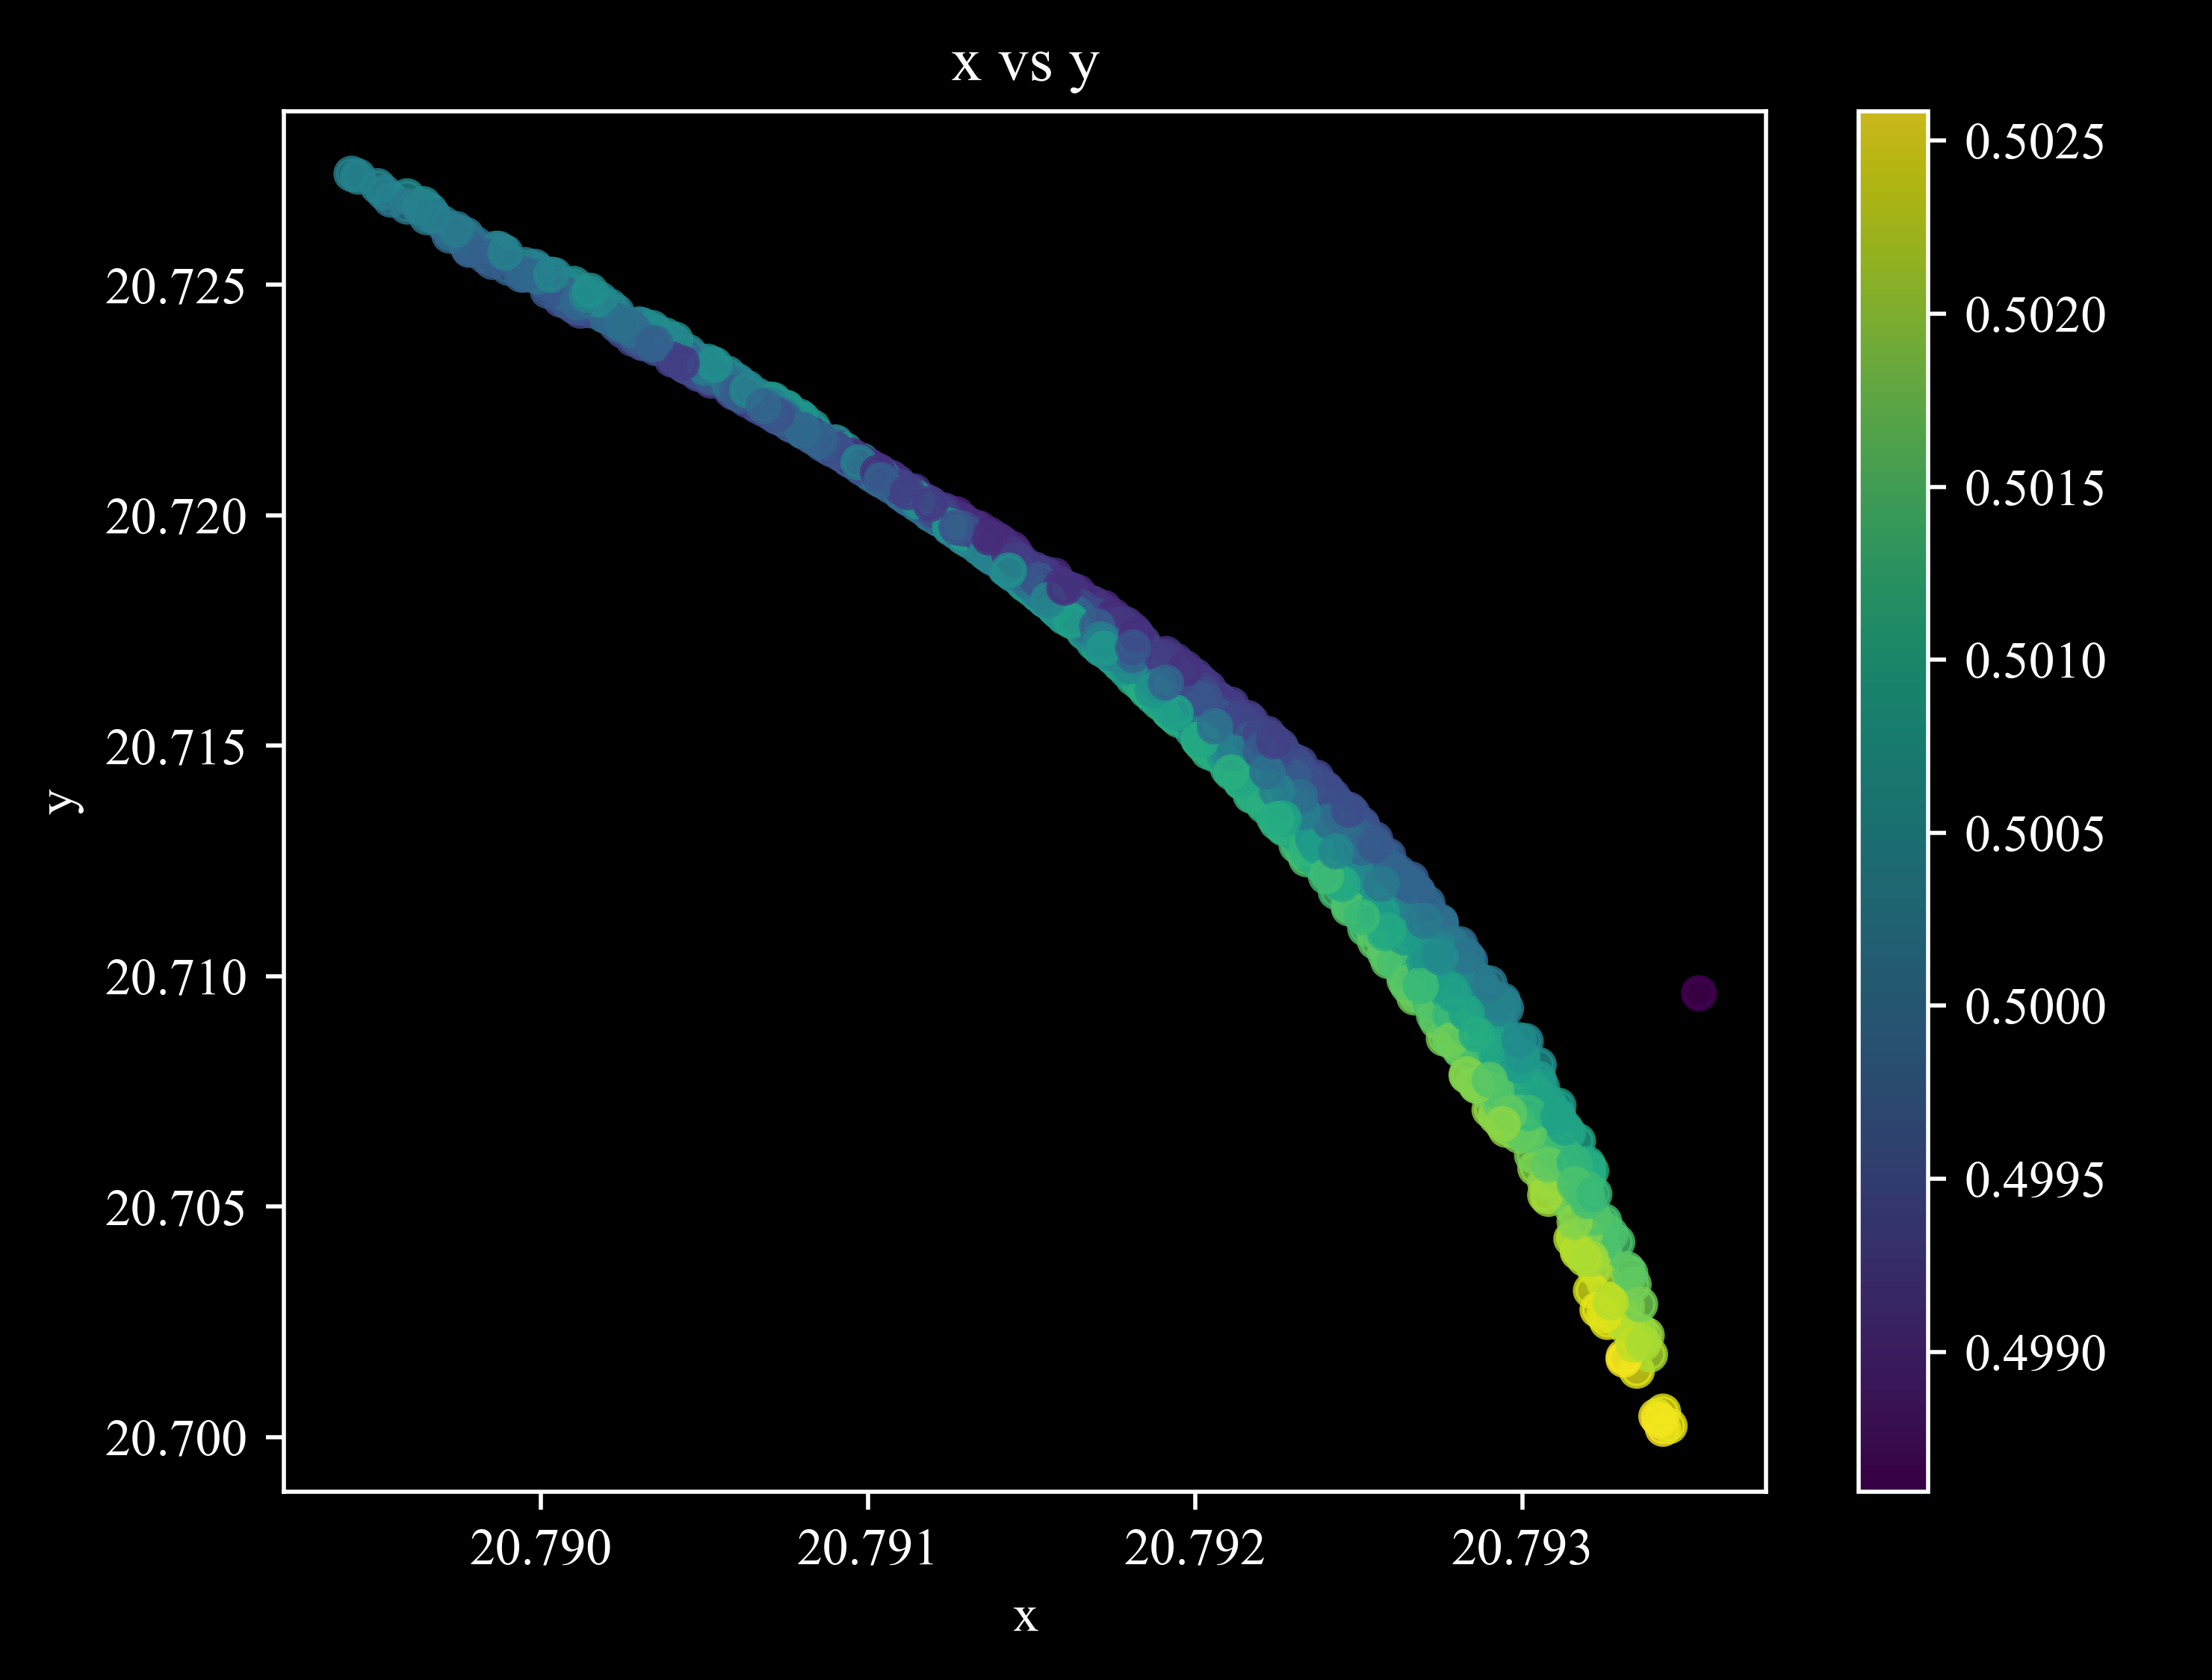

In [22]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

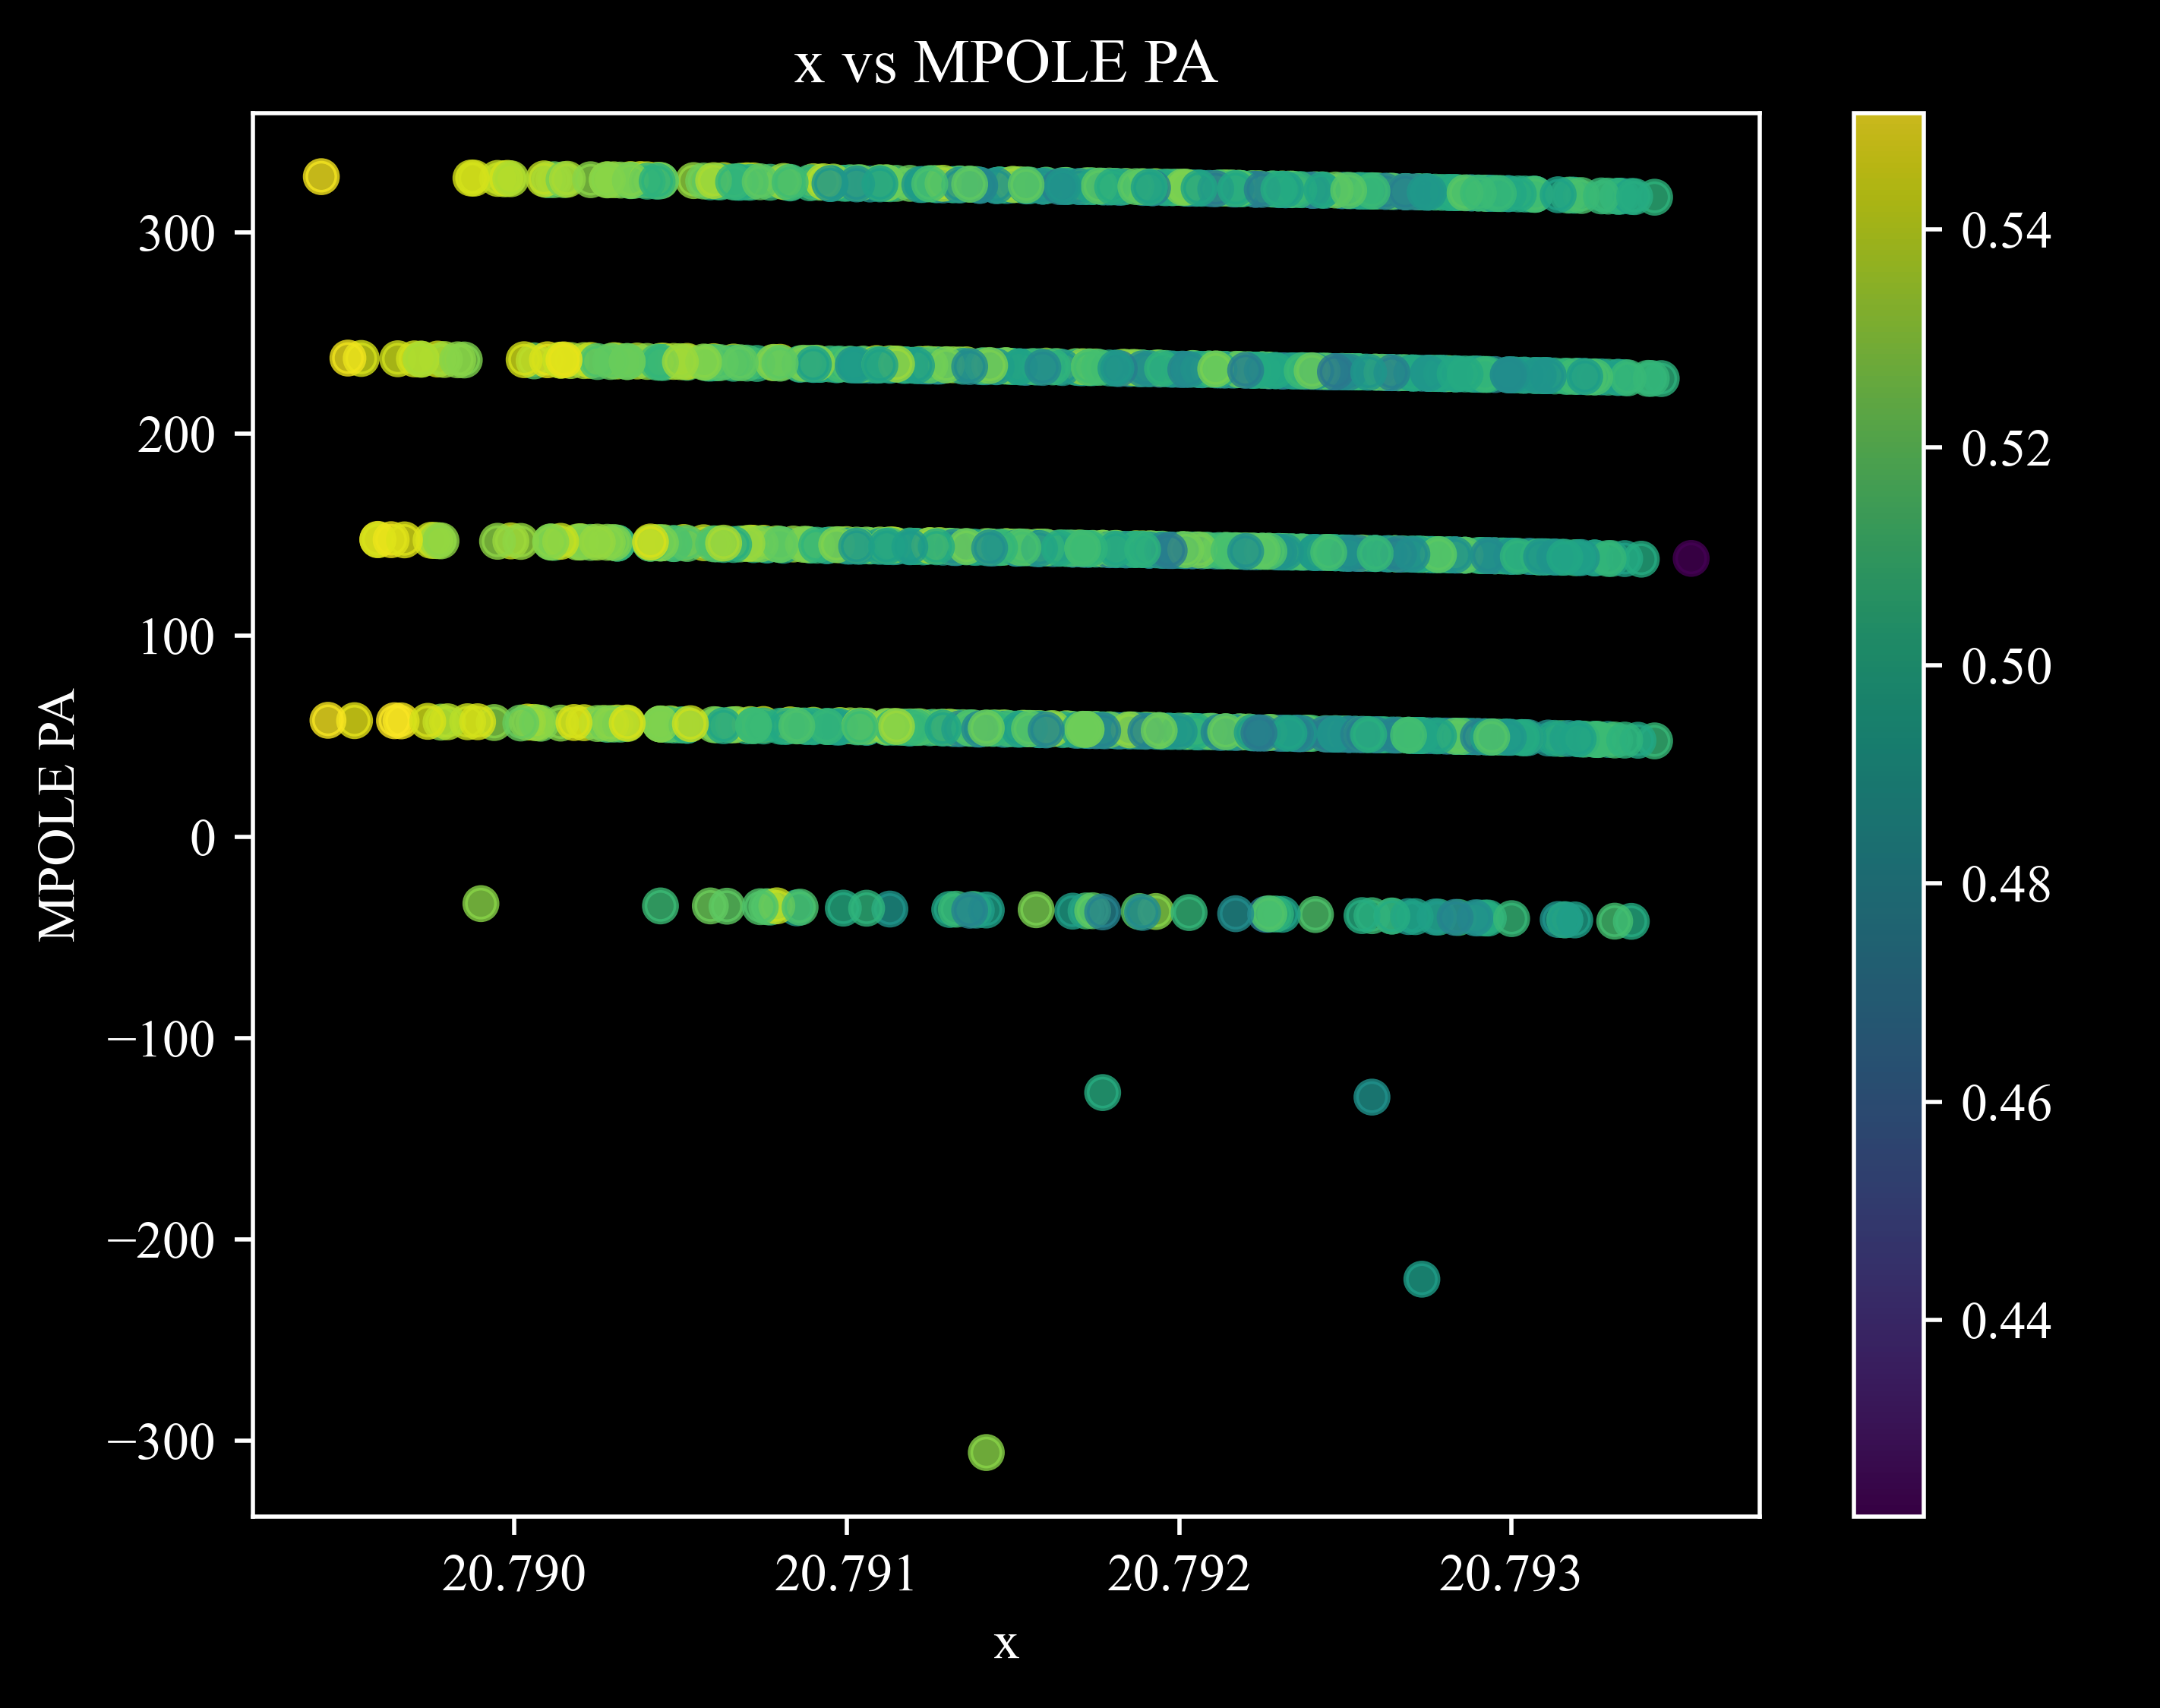

In [23]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

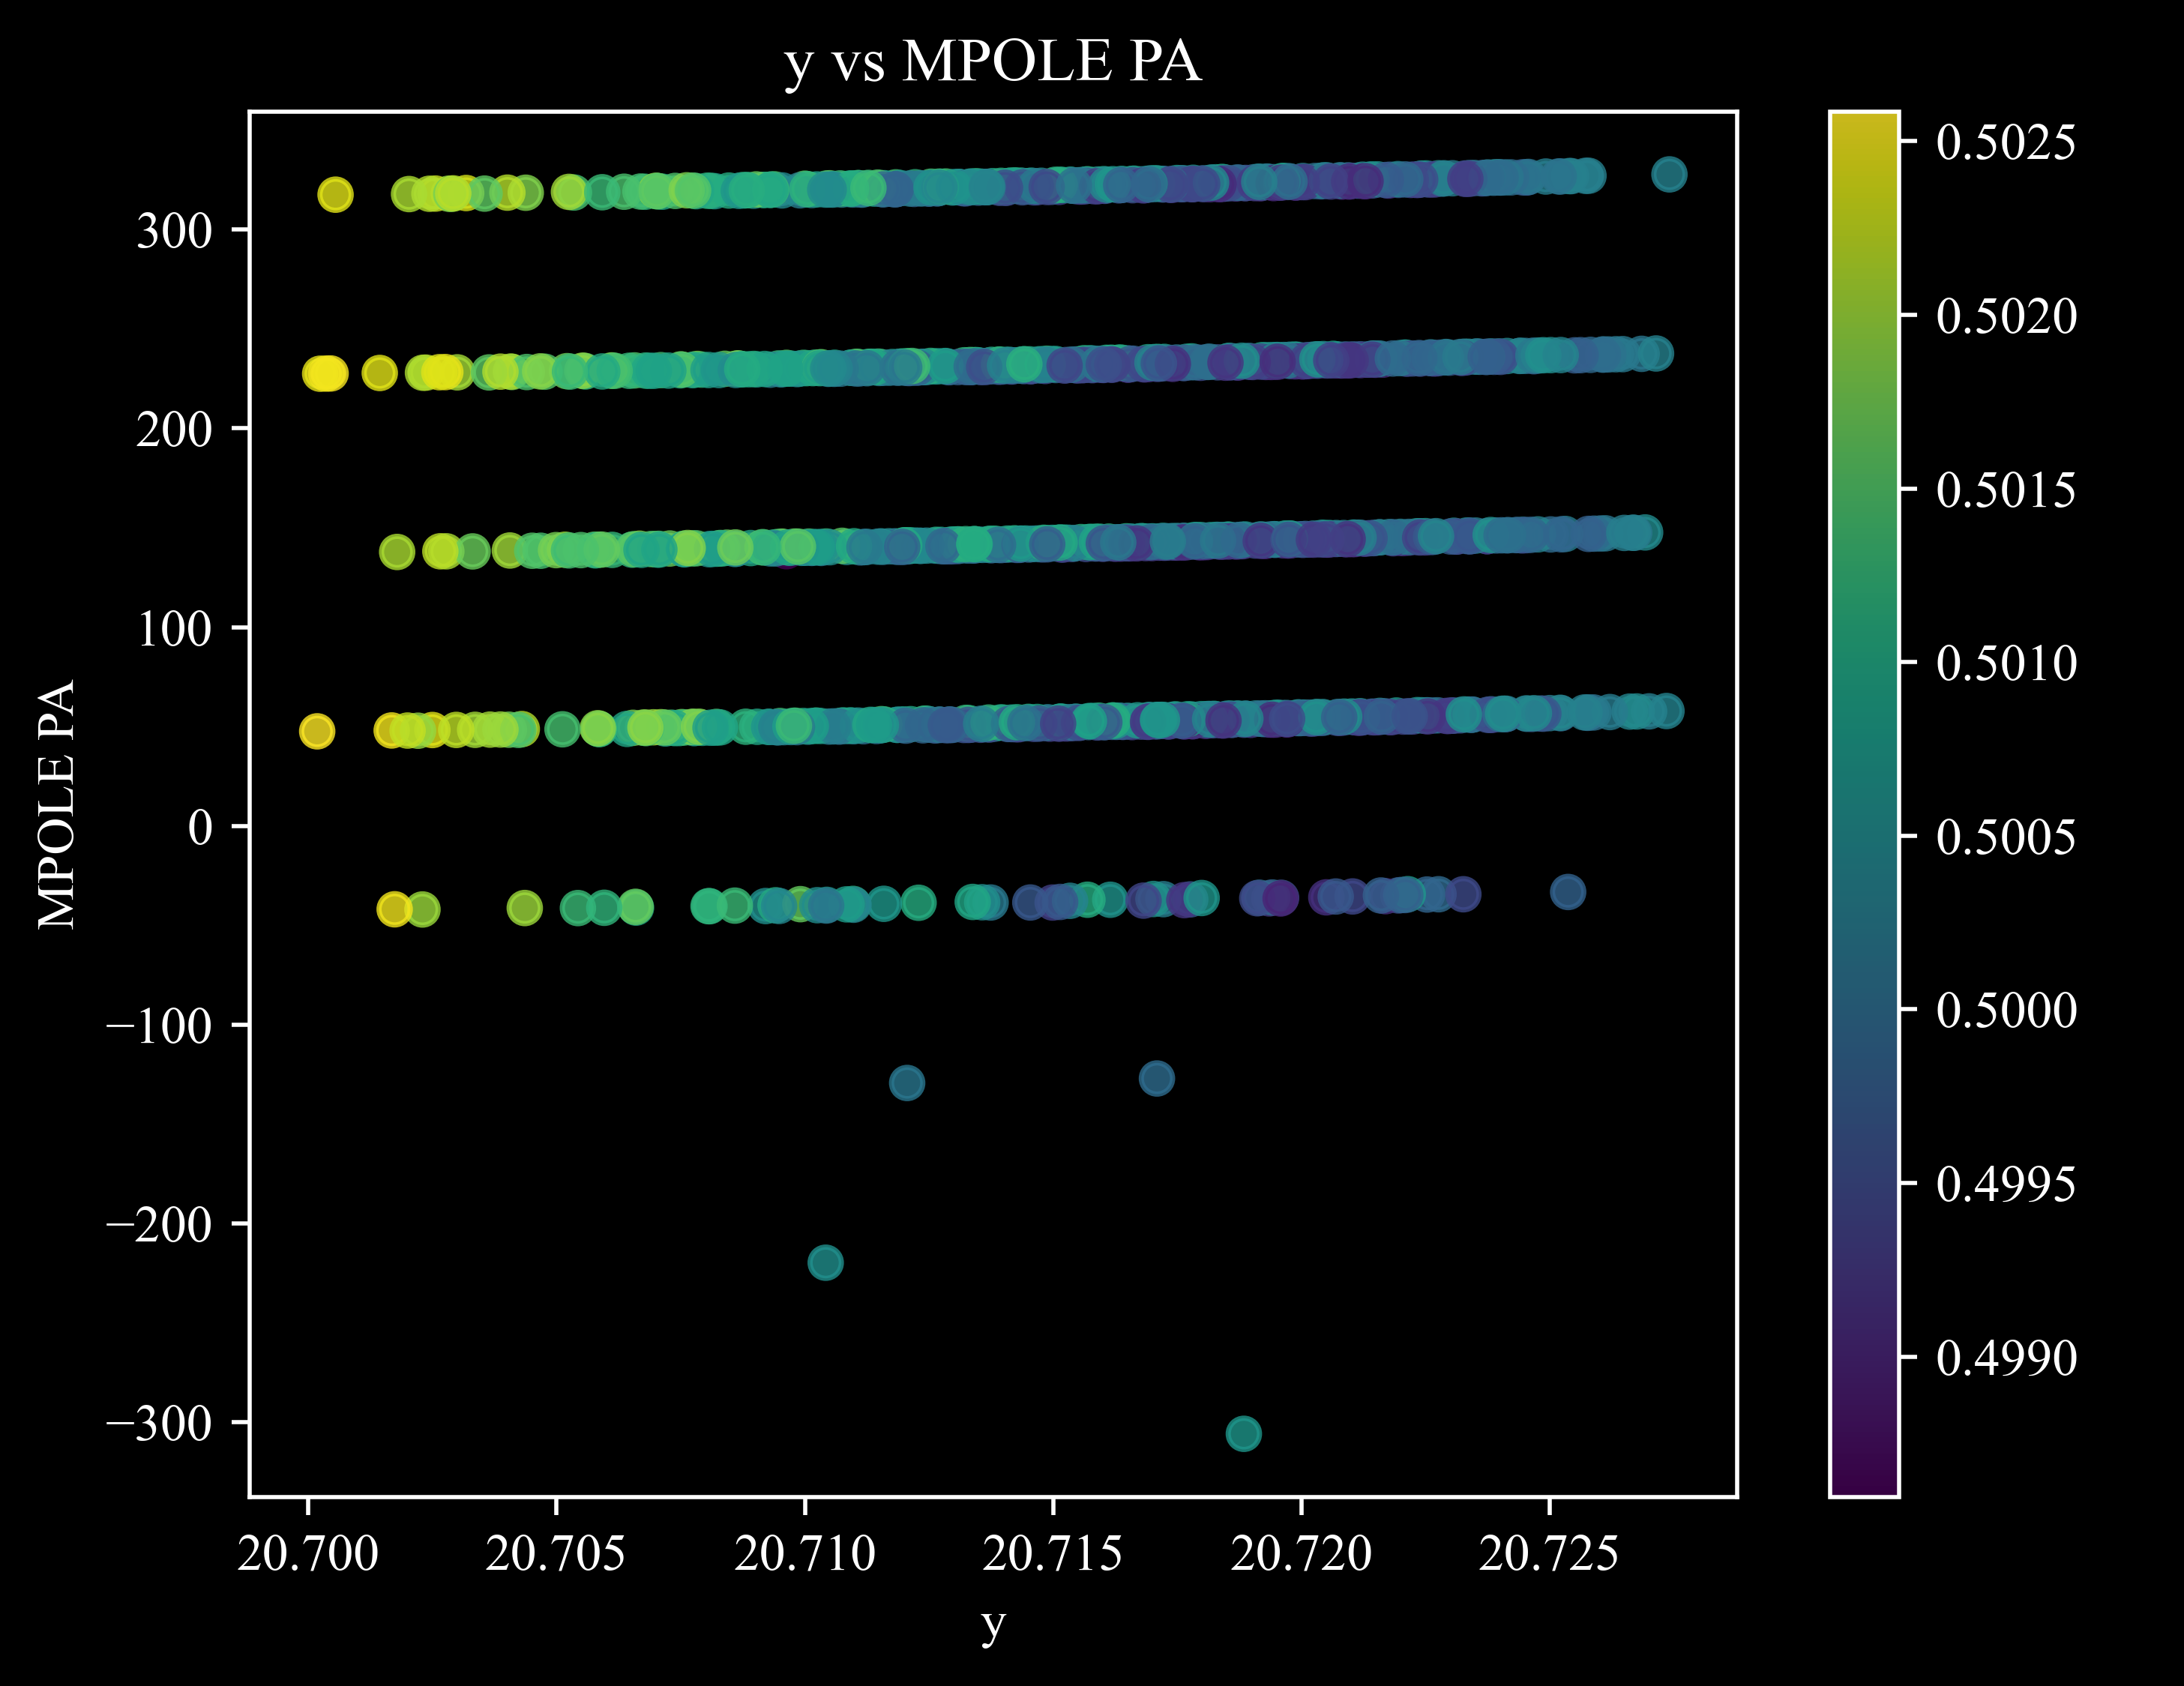

In [24]:
plt.scatter(filtered_df['y'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('y', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('y vs MPOLE PA')
plt.show()

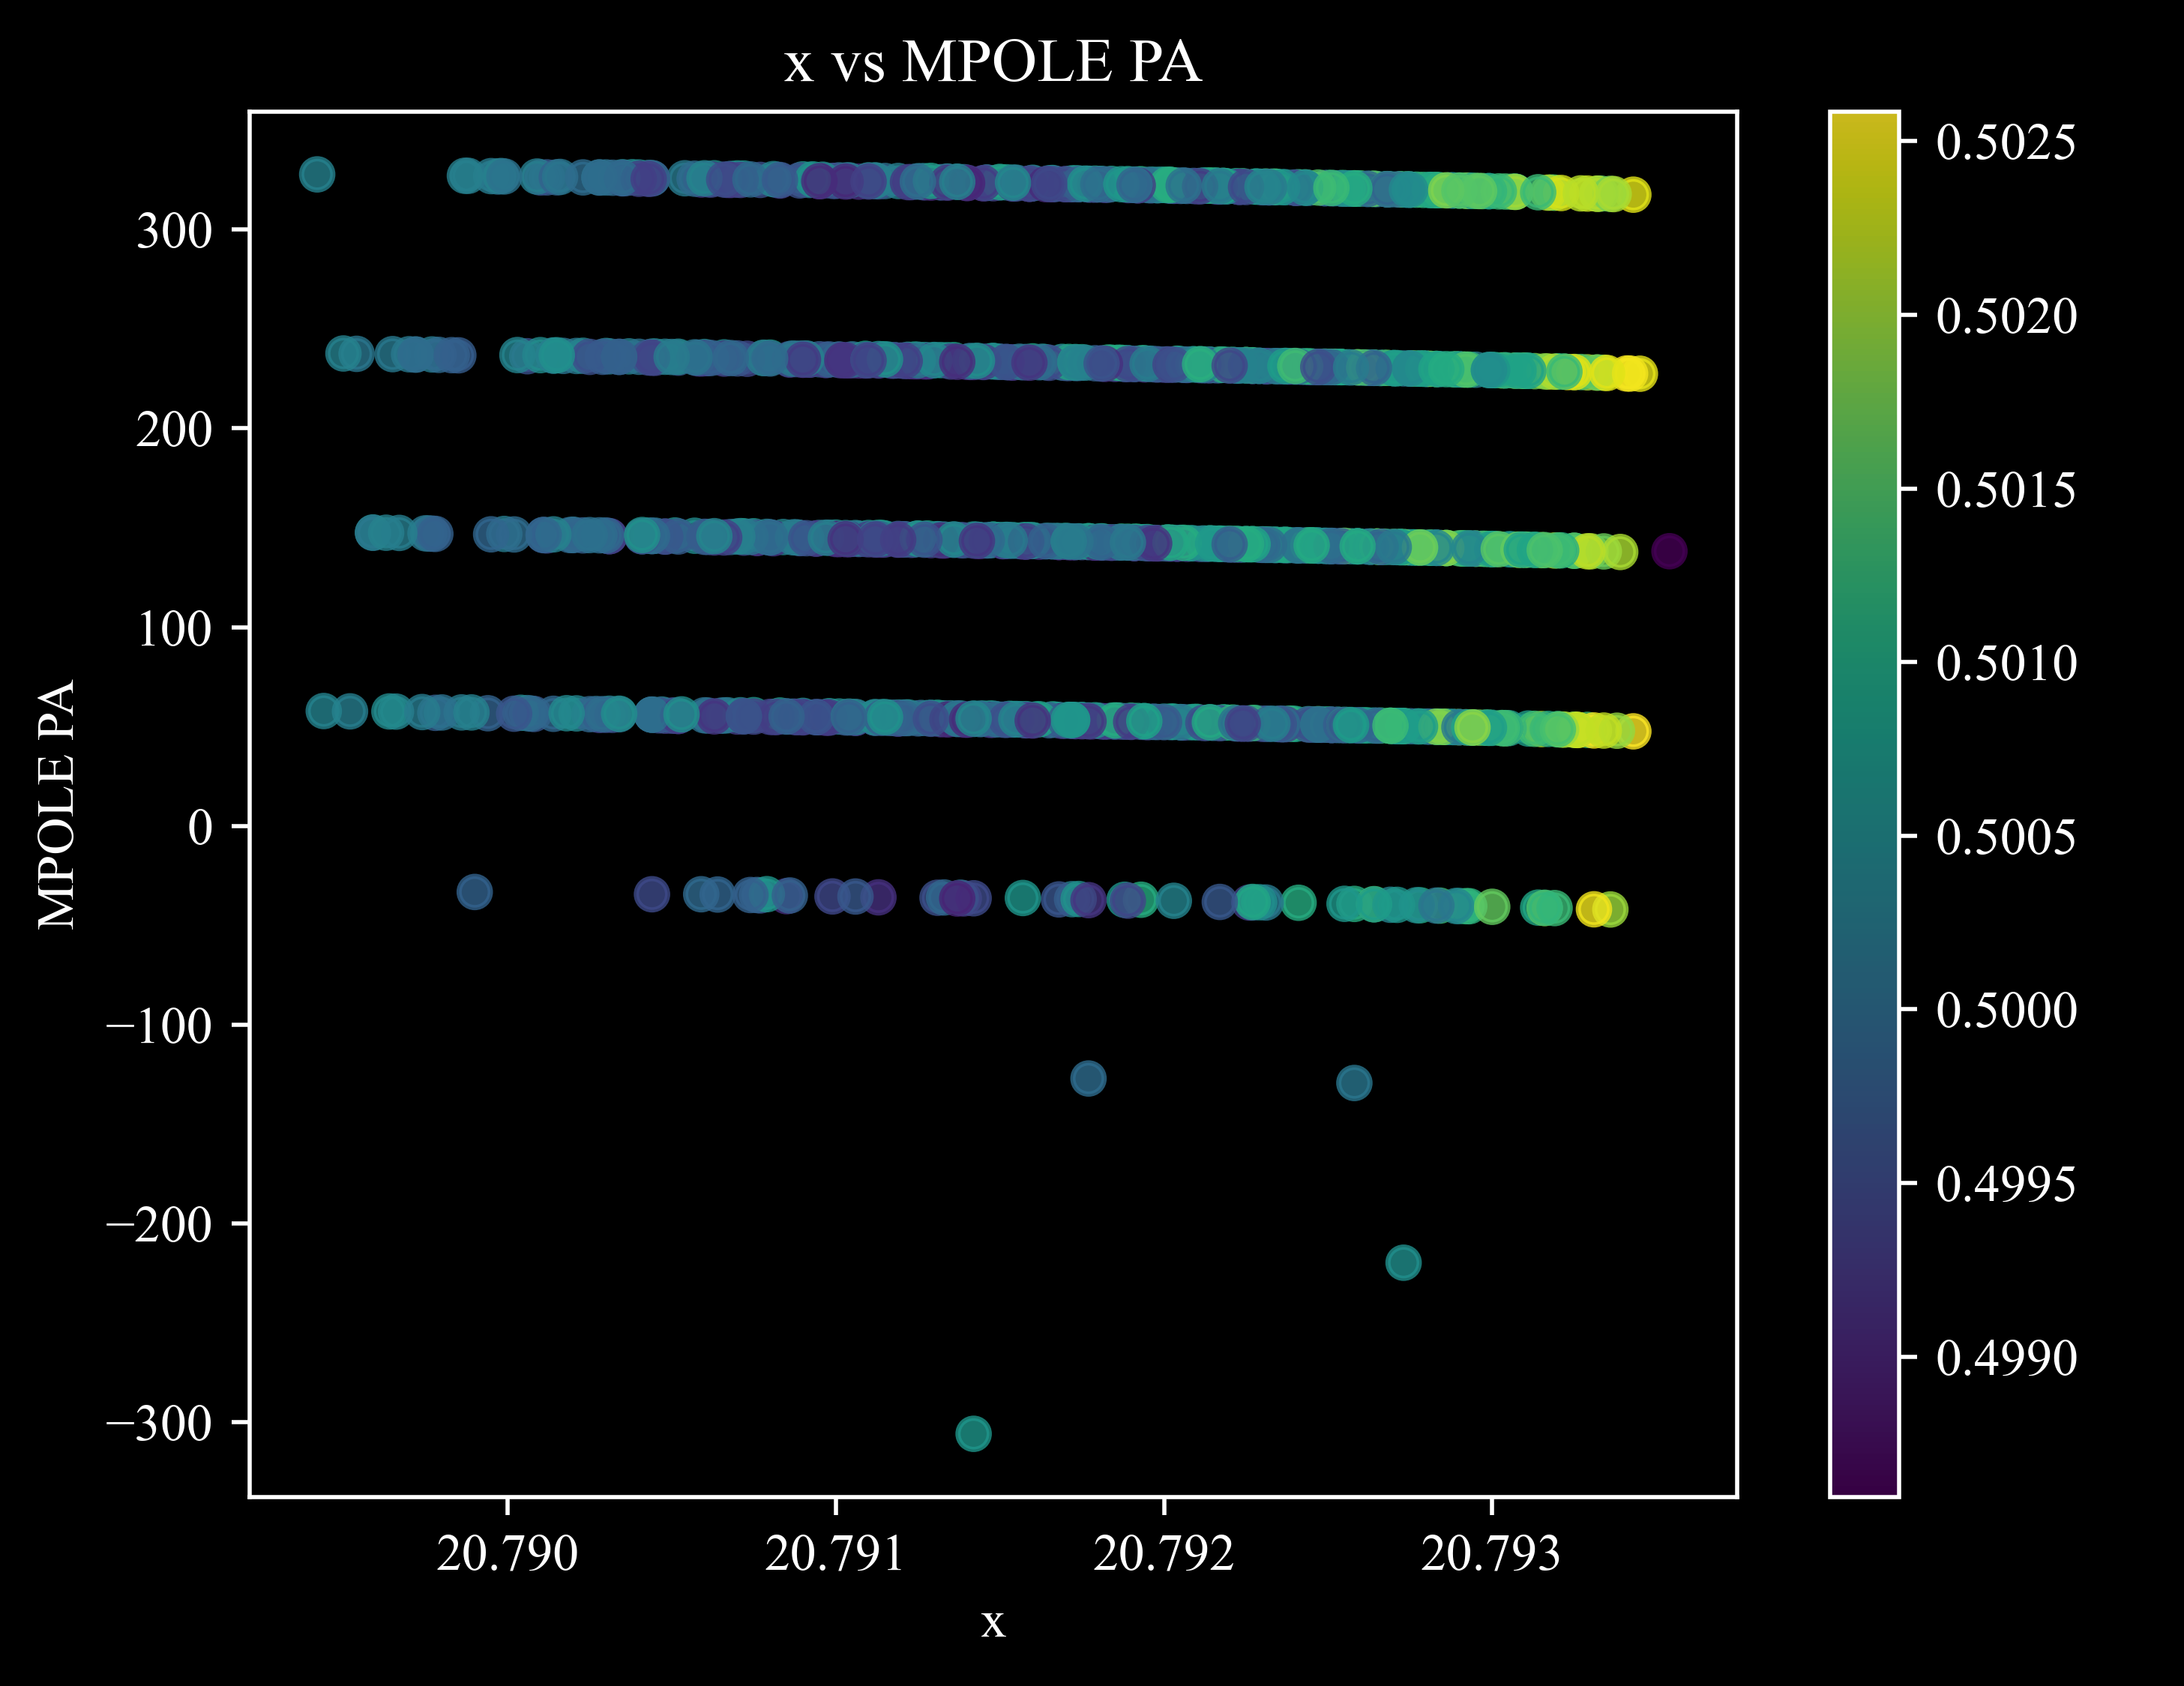

In [25]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

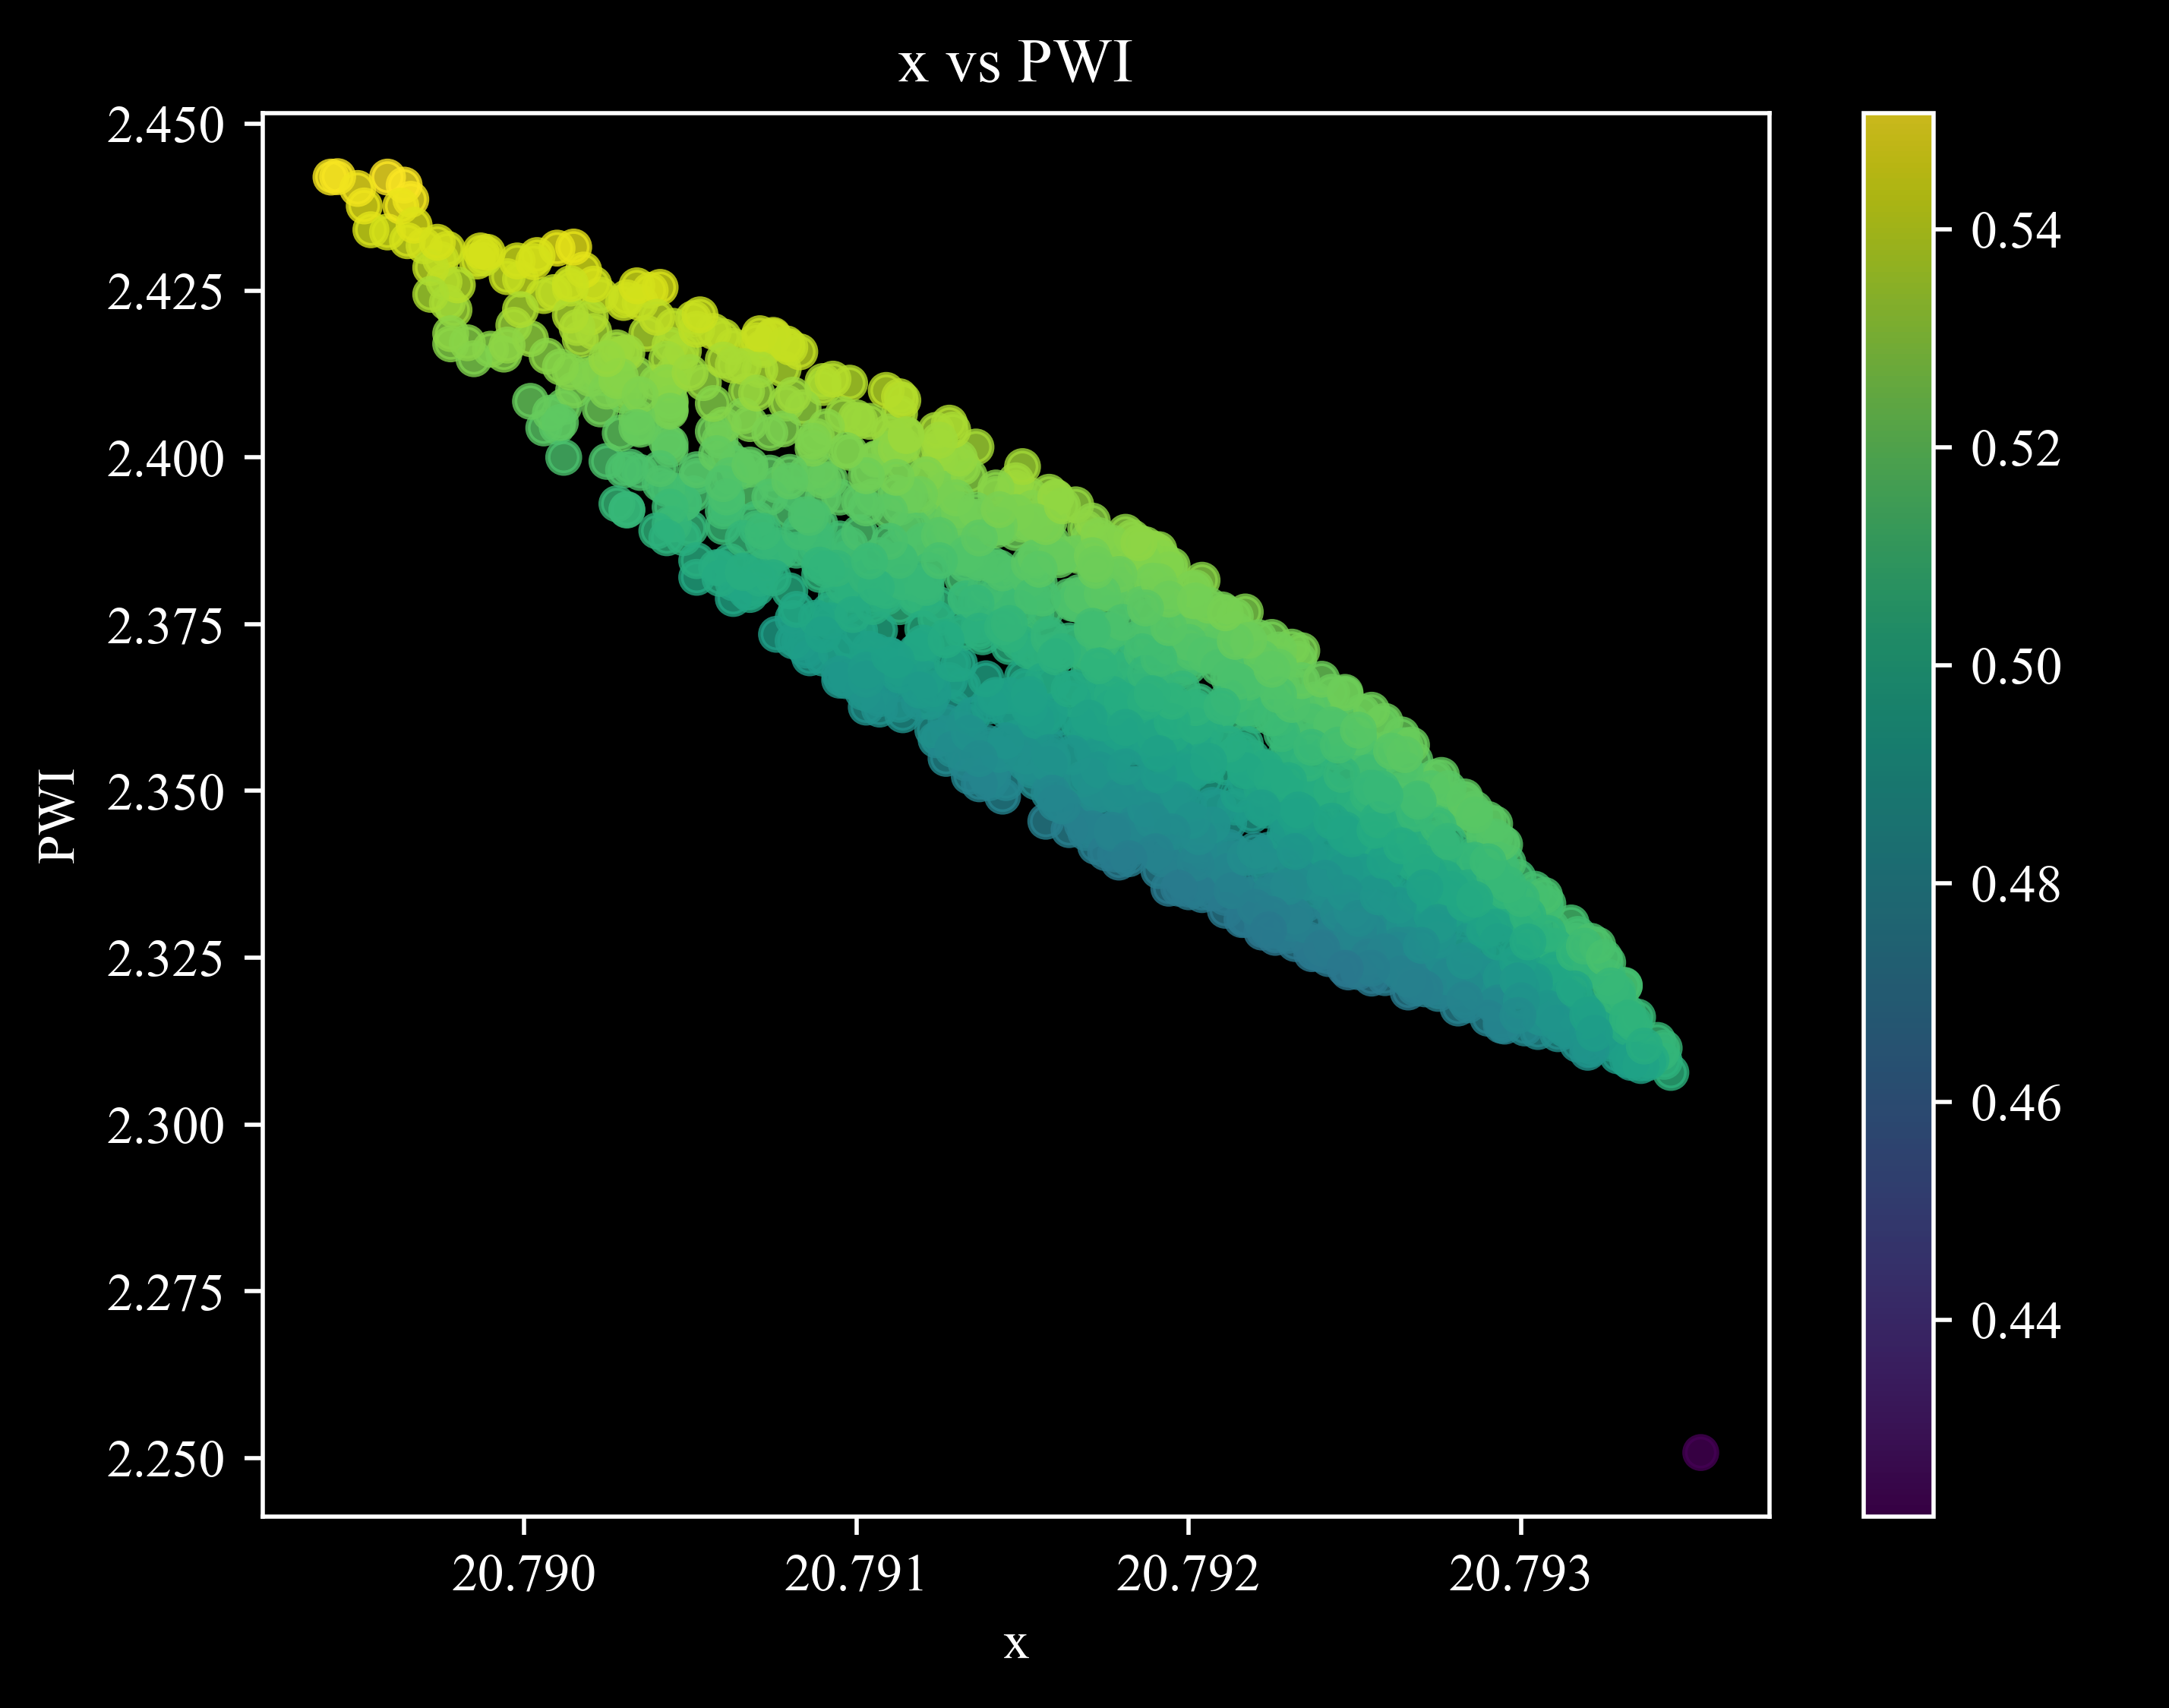

In [26]:
plt.scatter(filtered_df['x'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('PWI', color = 'w')
plt.title('x vs PWI')
plt.show()